In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import statsmodels.api as sm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as st
from collections import Counter
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from functions import *
import seaborn as sns
from scipy.stats import ks_2samp
import datetime as datetime
from scipy.stats import chi2_contingency
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from datetime import datetime

## Nettoyage de données

In [7]:
offres_2021 = pd.read_csv("offres_2021.csv",sep=';')
offres_2021

,Prix_client,Prix_jobber,Raison_dannulation,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Ancienneté_du_jobber,NJS,Ancienneté_du_client,Nombre_de_jobs_postés_du_client,Nombre_de_jobs_réservés_du_client,Nombre_de_jobs_payés_du_client,Statut_VIP_OUI_NON,Déclaratif_OUI_NON,Durée_initiale_du_job,Heures_supp,Fees_client
0,47.0,47.0,NaN,538034,352741,70,333,2.48,Paris,Ménage,Ménage à domicile,REPEAT,APP,2021-08-01 00:06:43 UTC,2021-08-01 00:07:54 UTC,2021-08-01 06:11:10 UTC,01/08/2021,NaN,26/11/2016,7,OUI,4.95,126,PAID,26/11/2016,NaN,29/09/2018,19,16,12,OUI,NON,3.5,0.0,5.0
1,44.0,44.0,NaN,1033636,1026710,5,19,3.76,Bas-Rhin,Déménagement,Aide au déménagement,NEW,WEB,2021-07-31 15:43:26 UTC,2021-08-01 01:54:03 UTC,2021-08-02 09:52:04 UTC,24/08/2021,NaN,23/07/2021,5,OUI,5.00,35,PAID,23/07/2021,NaN,31/07/2021,1,1,0,NON,NON,2.0,0.0,8.0
2,44.0,48.0,NaN,1017460,355724,22,151,13.73,Isère,Déménagement,Aide au déménagement,NEW,WEB,2021-07-11 09:07:40 UTC,2021-08-01 02:04:23 UTC,2021-08-01 07:48:17 UTC,07/08/2021,NaN,14/12/2016,9,NON,4.95,28,PAID,14/12/2016,NaN,11/07/2021,1,1,0,NON,NON,2.0,2.0,16.0
3,36.0,44.0,J'ai trouvé une autre solution,585298,775726,39,772,42.30,Yvelines,Ménage,Ménage à domicile,REPEAT,WEB,2021-07-29 11:24:18 UTC,2021-08-01 02:29:55 UTC,2021-08-01 16:01:44 UTC,05/08/2021,2021-08-04 06:36:37 UTC,30/06/2020,5,OUI,4.83,1059,CANCELED,30/06/2020,NaN,25/02/2019,3,2,1,NON,NON,3.0,0.0,8.0
4,60.0,60.0,NaN,1033888,802342,23,115,3.42,Meurthe-et-Moselle,Déménagement,Déplacer un meuble,NEW,APP,2021-08-01 02:07:28 UTC,2021-08-01 04:51:49 UTC,2021-08-01 07:56:30 UTC,01/08/2021,NaN,18/08/2020,4,OUI,4.95,185,PAID,18/08/2020,NaN,01/08/2021,1,1,0,NON,NON,2.5,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31953,16.0,20.0,NaN,751438,1087634,2,3,1.20,Eure-et-Loir,Déménagement,Déplacer de l'électroménager,REPEAT,APP,2021-11-01 21:17:31 UTC,2021-11-01 22:14:43 UTC,2021-11-02 08:16:43 UTC,02/11/2021,NaN,13/10/2021,0,NON,5.00,2,PAID,13/10/2021,6.0,09/05/2020,26,17,14,OUI,NON,1.0,0.0,5.0
31954,25.0,58.0,Manipulation ADMIN,1072020,622003,147,2440,11.58,Seine-Saint-Denis,Déménagement,Déplacer de l'électroménager,REPEAT,WEB,2021-11-01 21:03:00 UTC,2021-11-01 22:22:56 UTC,2021-11-02 11:23:24 UTC,06/11/2021,2021-11-02 11:50:26 UTC,10/06/2019,10,OUI,4.92,3174,CANCELED,10/06/2019,32.0,20/09/2021,8,5,2,NON,NON,1.0,0.0,10.0
31955,65.0,69.0,Le jobber ne s'est pas présenté,953245,1086053,14,275,7.23,Seine-Saint-Denis,Bricolage,Montage de meubles IKEA,REPEAT,WEB,2021-11-01 21:54:25 UTC,2021-11-01 22:37:23 UTC,2021-11-02 15:14:41 UTC,03/11/2021,2021-11-03 20:15:40 UTC,11/10/2021,12,NON,4.92,17,CANCELED,11/10/2021,-16.0,16/04/2021,19,11,8,OUI,NON,3.0,0.0,12.0
31956,44.0,120.0,J'ai trouvé une autre solution,1096951,707321,159,951,5.95,Gironde,Bricolage,Autre job de rénovation,REPEAT,WEB,2021-11-01 22:50:31 UTC,2021-11-01 22:54:56 UTC,2021-11-01 23:03:13 UTC,04/11/2021,2021-11-02 07:24:50 UTC,22/12/2019,1,OUI,4.96,1647,CANCELED,22/12/2019,9.0,27/10/2021,3,2,1,NON,NON,2.0,0.0,20.0


In [8]:
offres_2021 = pd.read_csv("offres_2021.csv",sep=';')

offres_2021['Date_et_heure_postulation'] = offres_2021['Date_et_heure_postulation'].str[:-7]
offres_2021['Date_et_heure_publication_du_job'] = offres_2021['Date_et_heure_publication_du_job'].str[:-7]
offres_2021['Date_et_heure_réservation'] = offres_2021['Date_et_heure_réservation'].str[:-7]
offres_2021['Date_et_heure_annulation'] = offres_2021['Date_et_heure_annulation'].str[:-7]

offres_2021['Date_et_heure_postulation'] = pd.to_datetime(offres_2021['Date_et_heure_postulation'], format="%Y-%m-%d %H:%M")
offres_2021['Date_et_heure_publication_du_job'] = pd.to_datetime(offres_2021['Date_et_heure_publication_du_job'], format="%Y-%m-%d %H:%M")
offres_2021['Date_et_heure_réservation'] = pd.to_datetime(offres_2021['Date_et_heure_réservation'], format="%Y-%m-%d %H:%M")
offres_2021['Date_et_heure_annulation'] = pd.to_datetime(offres_2021['Date_et_heure_annulation'], format="%Y-%m-%d %H:%M")

offres_2021['Date_dinscription_jobber'] = pd.to_datetime(offres_2021['Date_dinscription_jobber'])
offres_2021['Date_du_job'] = pd.to_datetime(offres_2021['Date_du_job'], format="%d/%m/%Y")

offres_2021['Date_postulation'] = offres_2021['Date_et_heure_postulation'].dt.strftime('%Y-%m-%d')
offres_2021['Date_publication_du_job'] = offres_2021['Date_et_heure_publication_du_job'].dt.strftime('%Y-%m-%d')
offres_2021['Date_réservation'] = offres_2021['Date_et_heure_réservation'].dt.strftime('%Y-%m-%d')
offres_2021['Date_et_heure_annulation'] = offres_2021['Date_et_heure_annulation'].dt.strftime('%Y-%m-%d')

offres_2021['Date_publication_du_job'] = pd.to_datetime(offres_2021['Date_publication_du_job'])

offres_2021['Différence_prix'] = offres_2021['Prix_jobber'] - offres_2021['Prix_client']
offres_2021['Différence_postulation_publication'] = offres_2021['Date_et_heure_postulation'] - offres_2021['Date_et_heure_publication_du_job'] 
offres_2021['Différence_réservation_postulation'] = offres_2021['Date_et_heure_réservation'] - offres_2021['Date_et_heure_postulation']
offres_2021['Différence_Date_du_job_réservation'] = offres_2021['Date_du_job'] - offres_2021['Date_publication_du_job'] 
offres_2021['Différence_réservation_postulation'] = offres_2021['Date_et_heure_réservation'] - offres_2021['Date_et_heure_postulation']
offres_2021['Différence_Date_du_job_publication'] = offres_2021['Date_du_job'] - offres_2021['Date_publication_du_job']

offres_2021['Différence_prix'] = offres_2021['Différence_prix'].astype('float64')
offres_2021['Distance_Job_Jobber_KM'] = offres_2021['Distance_Job_Jobber_KM'].astype('float64')
offres_2021['Différence_Date_du_job_réservation'] = offres_2021['Différence_Date_du_job_réservation'].dt.days
offres_2021['Différence_Date_du_job_publication'] = offres_2021['Différence_Date_du_job_publication'].dt.days
offres_2021['Différence_réservation_postulation'] = offres_2021['Différence_réservation_postulation'].dt.days
offres_2021['Différence_postulation_publication'] = offres_2021['Différence_postulation_publication'].dt.days

offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation'].astype('str')

offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation'].fillna(0)
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber a un comportement inapproprié'],[1])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Client supprimé'],[2])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['J\'ai trouvé une autre solution'],[3])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Je n\'ai plus besoin du service'],[4])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Jobber supprimé'],[5])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber a annulé'],[6])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber demande un prix plus élevé'],[7])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber demande à être payé en direct'],[8])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber n\'a pas le bon équipement'],[9])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber n\'a pas les compétences'],[10])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber ne répond pas à mes appels / messages'],[11])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber ne s\'est pas présenté'],[12])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Le jobber n’est pas disponible à la date convenue'],[13])
offres_2021['Raison_dannulation_num'] = offres_2021['Raison_dannulation_num'].replace(['Manipulation ADMIN'],[14])

offres_2021['Statut_de_loffre_num'] = offres_2021['Statut_de_loffre_PAID_CANCELED'].replace(['PAID','CANCELED'],[0,1])
offres_2021['Job_publié_APP_WEB_num'] = offres_2021['Job_publié_APP_WEB'].replace(['WEB','APP'],[0,1])
offres_2021['Client_NEW_REPEAT_num'] = offres_2021['Client_NEW_REPEAT'].replace(['NEW','REPEAT'],[0,1])

offres_2021['Catégorie_num'] = offres_2021['Catégorie'].fillna(0)
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Aide à domicile'],[1])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Animaux'],[2])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Bricolage'],[3])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Cours particuliers'],[4])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Déménagement'],[5])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Enfants'],[6])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Informatique'],[7])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Jardinage'],[8])
offres_2021['Catégorie_num'] = offres_2021['Catégorie_num'].replace(['Ménage'],[9])

offres_2021


,Prix_client,Prix_jobber,Raison_dannulation,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Ancienneté_du_jobber,NJS,Ancienneté_du_client,Nombre_de_jobs_postés_du_client,Nombre_de_jobs_réservés_du_client,Nombre_de_jobs_payés_du_client,Statut_VIP_OUI_NON,Déclaratif_OUI_NON,Durée_initiale_du_job,Heures_supp,Fees_client,Date_postulation,Date_publication_du_job,Date_réservation,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
0,47.0,47.0,NaN,538034,352741,70,333,2.48,Paris,Ménage,Ménage à domicile,REPEAT,APP,2021-08-01 00:06:00,2021-08-01 00:07:00,2021-08-01 06:11:00,2021-08-01,NaN,2016-11-26,7,OUI,4.95,126,PAID,26/11/2016,NaN,29/09/2018,19,16,12,OUI,NON,3.5,0.0,5.0,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,0,0,0,0,1,1,9
1,44.0,44.0,NaN,1033636,1026710,5,19,3.76,Bas-Rhin,Déménagement,Aide au déménagement,NEW,WEB,2021-07-31 15:43:00,2021-08-01 01:54:00,2021-08-02 09:52:00,2021-08-24,NaN,2021-07-23,5,OUI,5.00,35,PAID,23/07/2021,NaN,31/07/2021,1,1,0,NON,NON,2.0,0.0,8.0,2021-08-01,2021-07-31,2021-08-02,0.0,0,1,24,24,0,0,0,0,5
2,44.0,48.0,NaN,1017460,355724,22,151,13.73,Isère,Déménagement,Aide au déménagement,NEW,WEB,2021-07-11 09:07:00,2021-08-01 02:04:00,2021-08-01 07:48:00,2021-08-07,NaN,2016-12-14,9,NON,4.95,28,PAID,14/12/2016,NaN,11/07/2021,1,1,0,NON,NON,2.0,2.0,16.0,2021-08-01,2021-07-11,2021-08-01,4.0,20,0,27,27,0,0,0,0,5
3,36.0,44.0,J'ai trouvé une autre solution,585298,775726,39,772,42.30,Yvelines,Ménage,Ménage à domicile,REPEAT,WEB,2021-07-29 11:24:00,2021-08-01 02:29:00,2021-08-01 16:01:00,2021-08-05,2021-08-04,2020-06-30,5,OUI,4.83,1059,CANCELED,30/06/2020,NaN,25/02/2019,3,2,1,NON,NON,3.0,0.0,8.0,2021-08-01,2021-07-29,2021-08-01,8.0,2,0,7,7,3,1,0,1,9
4,60.0,60.0,NaN,1033888,802342,23,115,3.42,Meurthe-et-Moselle,Déménagement,Déplacer un meuble,NEW,APP,2021-08-01 02:07:00,2021-08-01 04:51:00,2021-08-01 07:56:00,2021-08-01,NaN,2020-08-18,4,OUI,4.95,185,PAID,18/08/2020,NaN,01/08/2021,1,1,0,NON,NON,2.5,0.0,10.0,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,0,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31953,16.0,20.0,NaN,751438,1087634,2,3,1.20,Eure-et-Loir,Déménagement,Déplacer de l'électroménager,REPEAT,APP,2021-11-01 21:17:00,2021-11-01 22:14:00,2021-11-02 08:16:00,2021-11-02,NaN,2021-10-13,0,NON,5.00,2,PAID,13/10/2021,6.0,09/05/2020,26,17,14,OUI,NON,1.0,0.0,5.0,2021-11-01,2021-11-01,2021-11-02,4.0,0,0,1,1,0,0,1,1,5
31954,25.0,58.0,Manipulation ADMIN,1072020,622003,147,2440,11.58,Seine-Saint-Denis,Déménagement,Déplacer de l'électroménager,REPEAT,WEB,2021-11-01 21:03:00,2021-11-01 22:22:00,2021-11-02 11:23:00,2021-11-06,2021-11-02,2019-10-06,10,OUI,4.92,3174,CANCELED,10/06/2019,32.0,20/09/2021,8,5,2,NON,NON,1.0,0.0,10.0,2021-11-01,2021-11-01,2021-11-02,33.0,0,0,5,5,14,1,0,1,5
31955,65.0,69.0,Le jobber ne s'est pas présenté,953245,1086053,14,275,7.23,Seine-Saint-Denis,Bricolage,Montage de meubles IKEA,REPEAT,WEB,2021-11-01 21:54:00,2021-11-01 22:37:00,2021-11-02 15:14:00,2021-11-03,2021-11-03,2021-11-10,12,NON,4.92,17,CANCELED,11/10/2021,-16.0,16/04/2021,19,11,8,OUI,NON,3.0,0.0,12.0,2021-11-01,2021-11-01,2021-11-02,4.0,0,0,2,2,12,1,0,1,3
31956,44.0,120.0,J'ai trouvé une autre solution,1096951,707321,159,951,5.95,Gironde,Bricolage,Autre job de réno

# I. Toutes catégories confondues

In [6]:
Raisons_annulations = offres_2021.groupby(['Raison_dannulation']).count()
Raisons_annulations

,Prix_client,Prix_jobber,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Date_postulation,Date_publication_du_job,Date_réservation,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
Raison_dannulation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Client supprimé,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
J'ai trouvé une autre solution,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1115,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431
Je n'ai plus besoin du service,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919,743,919,919,919,919,919,919,919,919,919,919,919,919,919,919,919
Jobber supprimé,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,12,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
Le jobber a annulé,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,727,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056
Le jobber a un comportement inapproprié,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,33,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Le jobber demande un prix plus élevé,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,174,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227
Le jobber demande à être payé en direct,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,23,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Le jobber n'a pas le bon équipement,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,286,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369


## a. Anova Statut_de_loffre - toutes catégories

In [9]:
anova_job_state = smf.ols('Statut_de_loffre_num ~ Prix_client + Prix_jobber + Jobs_réalisés_par_le_jobber + Nombre_doffres_faites_par_le_jobber + Distance_Job_Jobber_KM + Nombre_de_commentaires_sur_le_job + Note_jobber + Nombre_de_commentaires_du_jobber + Différence_prix + Différence_postulation_publication + Différence_réservation_postulation + Différence_Date_du_job_réservation + Différence_Date_du_job_publication + Job_publié_APP_WEB_num + Client_NEW_REPEAT_num + Catégorie_num', data=offres_2021).fit()
print(anova_job_state.summary())



                             OLS Regression Results                             
Dep. Variable:     Statut_de_loffre_num   R-squared:                       0.028
Model:                              OLS   Adj. R-squared:                  0.028
Method:                   Least Squares   F-statistic:                     57.21
Date:                  Mon, 08 Nov 2021   Prob (F-statistic):          1.82e-159
Time:                          15:50:05   Log-Likelihood:                -14180.
No. Observations:                 27439   AIC:                         2.839e+04
Df Residuals:                     27424   BIC:                         2.851e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## b. Anova Raison_dannulation - toutes catégories job CANCELED

In [8]:
jobs_annulés = offres_2021 [ (offres_2021["Statut_de_loffre_PAID_CANCELED"] == "CANCELED")]

anova_jobs_annulés = smf.ols('Raison_dannulation_num ~ Prix_client + Prix_jobber + Jobs_réalisés_par_le_jobber + Nombre_doffres_faites_par_le_jobber + Distance_Job_Jobber_KM + Nombre_de_commentaires_sur_le_job + Note_jobber + Nombre_de_commentaires_du_jobber + Différence_prix + Différence_postulation_publication + Différence_réservation_postulation + Différence_Date_du_job_réservation + Différence_Date_du_job_publication + Job_publié_APP_WEB_num + Client_NEW_REPEAT_num + Catégorie_num', data=jobs_annulés).fit()
print(anova_jobs_annulés.summary())


                              OLS Regression Results                              
Dep. Variable:     Raison_dannulation_num   R-squared:                       0.020
Model:                                OLS   Adj. R-squared:                  0.017
Method:                     Least Squares   F-statistic:                     7.195
Date:                    Thu, 04 Nov 2021   Prob (F-statistic):           5.12e-15
Time:                            12:57:57   Log-Likelihood:                -13696.
No. Observations:                    4885   AIC:                         2.742e+04
Df Residuals:                        4870   BIC:                         2.752e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

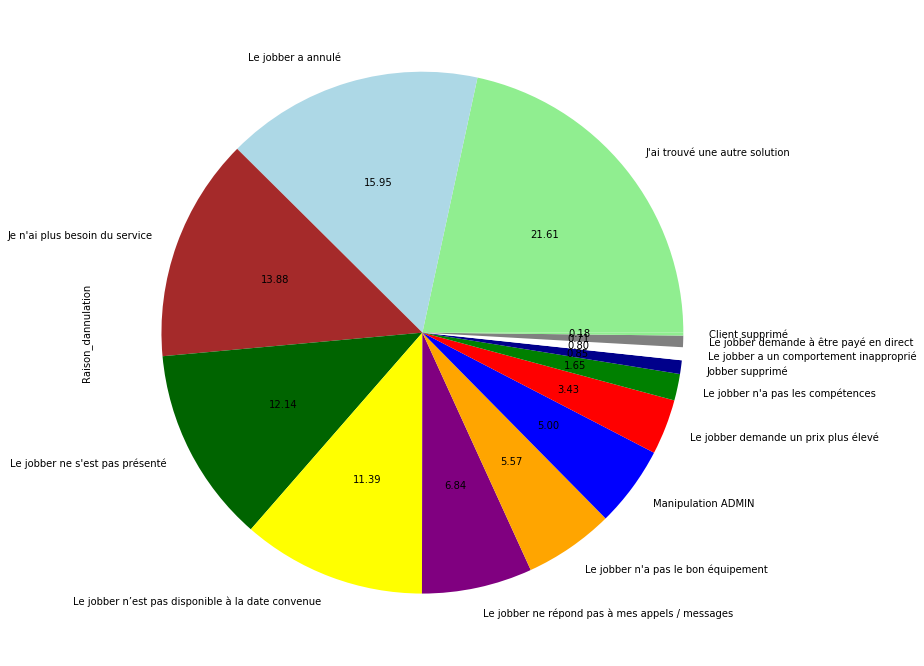

In [9]:
jobs_annulés["Raison_dannulation"].value_counts(normalize=True).plot(kind='pie', figsize = (18, 12), colors = ['lightgreen','lightblue','brown','darkgreen','yellow', 'purple', 'orange', 'blue','red','green','darkblue','white','grey'], autopct = '%.2f')
plt.show()


## c. Anova Catégories_dannulation - toutes catégories job CANCELED

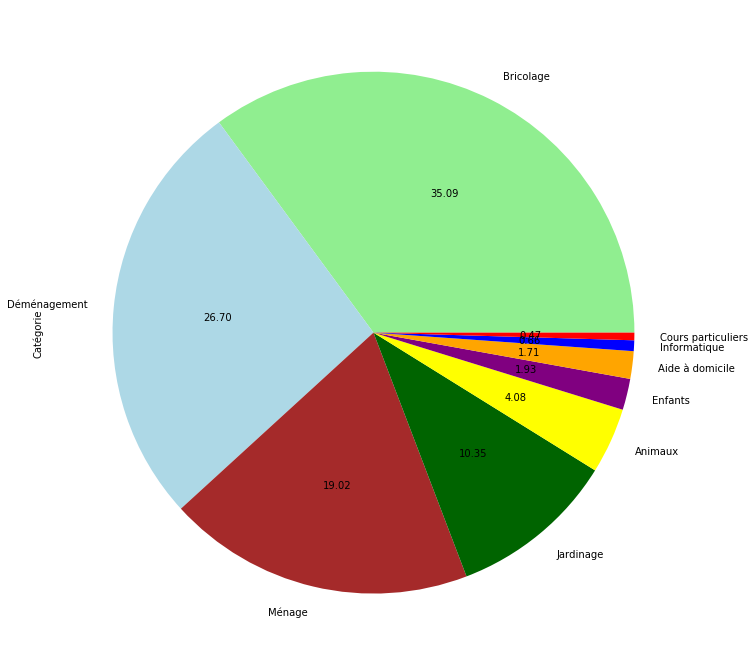

In [17]:
jobs_annulés["Catégorie"].value_counts(normalize=True).plot(kind='pie', figsize = (18, 12), colors = ['lightgreen','lightblue','brown','darkgreen','yellow', 'purple', 'orange', 'blue','red','green','darkblue','white','grey'], autopct = '%.2f')
plt.show()


In [34]:
X = "Catégorie" 
Y = "Statut_de_loffre_PAID_CANCELED" 

jobs_annulés_categ = offres_2021.copy()
jobs_annulés_categ = jobs_annulés_categ[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
jobs_annulés_categ = jobs_annulés_categ.div(jobs_annulés_categ.Total.values, axis=0)*100


annulés_categ_canceled = jobs_annulés_categ['CANCELED'].tolist()
annulés_categ_paid = jobs_annulés_categ['PAID'].tolist()

jobs_annulés_categ


Statut_de_loffre_PAID_CANCELED,CANCELED,PAID,Total
Catégorie,,,
Aide à domicile,40.794224,59.205776,100.0
Animaux,37.087912,62.912088,100.0
Bricolage,21.973137,78.026863,100.0
Cours particuliers,42.465753,57.534247,100.0
Déménagement,23.655339,76.344661,100.0
Enfants,37.982196,62.017804,100.0
Informatique,26.829268,73.170732,100.0
Jardinage,29.013130,70.986870,100.0
Ménage,28.108953,71.891047,100.0


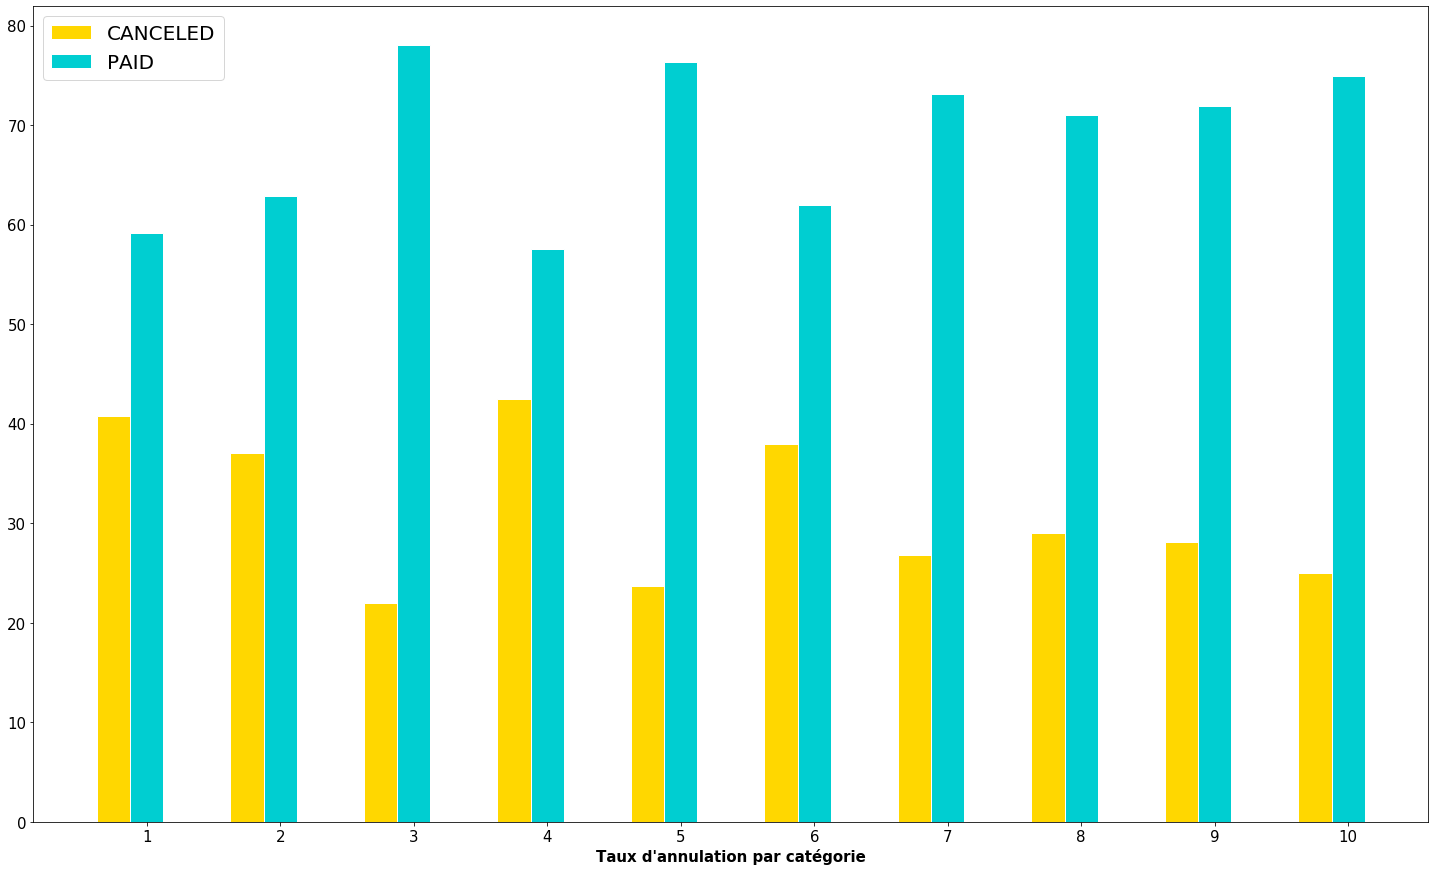

In [41]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = annulés_categ_canceled
bars2 = annulés_categ_paid

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
r12 = [x + barWidth for x in r11]
r13 = [x + barWidth for x in r12]
r14 = [x + barWidth for x in r13]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='CANCELED')
plt.bar(r2, bars2, color='darkturquoise', width=barWidth, edgecolor='white', label='PAID')
 
# Add xticks on the middle of the group bars
plt.xlabel('Taux d\'annulation par catégorie', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['1','2','3','4', '5', '6','7','8','9','10','11','12','13','14','Total'])

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()  


1 : Aide à domicile  
2 : Animaux  
3 : Bricolage  
4 : Cours particuliers  
5 : Déménagement  
6 : Enfants  
7 : Informatique  
8 : Jardinage  
9 : Ménage  
10 : Total  

In [18]:
Catégorie = offres_2021.groupby(['Catégorie']).mean()
Catégorie

,Prix_client,Prix_jobber,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Nombre_de_commentaires_sur_le_job,Note_jobber,Nombre_de_commentaires_du_jobber,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
Catégorie,,,,,,,,,,,,,,,,,,,,
Aide à domicile,49.743682,53.478339,877486.685921,858848.407942,20.516245,167.649819,18.272202,4.783394,4.896389,190.126354,3.734657,0.657040,1.057762,7.303249,7.303249,3.353791,0.407942,0.415162,0.657040,1.0
Animaux,74.213599,75.945055,969414.729396,867676.122253,11.104396,112.693681,27.977802,5.663462,4.895223,128.837912,1.731456,0.359890,0.369505,7.309066,7.309066,2.554945,0.370879,0.260989,0.394231,2.0
Bricolage,64.609005,74.926977,917081.592036,792691.470961,75.979947,618.125804,21.041592,6.194760,4.913269,971.277053,10.317972,0.678774,0.209989,4.387628,4.387628,1.626372,0.219731,0.359345,0.526958,3.0
Cours particuliers,26.520548,27.465753,851961.506849,864946.150685,32.547945,213.301370,15.302466,2.493151,4.884468,116.315068,0.945205,2.013699,0.506849,7.794521,7.794521,2.013699,0.424658,0.712329,0.917808,4.0
Déménagement,55.626706,76.125100,950758.009232,783645.904201,78.289805,840.347739,26.648470,7.670458,4.932349,1130.735751,20.498394,0.630987,0.568772,6.668986,6.668986,1.707252,0.236553,0.270538,0.392427,5.0
Enfants,46.364985,47.639466,882884.902077,935958.922849,9.658754,121.750742,22.173323,3.688427,4.857606,129.029674,1.274481,0.332344,0.471810,5.231454,5.231454,2.774481,0.379822,0.587537,0.753709,6.0
Informatique,40.091463,42.347561,881336.060976,746664.487805,22.817073,190.536585,27.853598,4.323171,4.926475,228.993902,2.256098,0.341463,0.243902,3.445122,3.445122,1.859756,0.268293,0.292683,0.646341,7.0
Jardinage,71.760906,89.166031,901282.723422,815735.184668,37.961457,337.199915,28.657421,5.138501,4.901985,517.274036,17.405125,1.235917,0.383312,6.743329,6.743329,2.426091,0.290131,0.367641,0.573062,8.0
Ménage,40.341706,42.957468,847584.990400,862334.835678,42.479795,354.973655,26.209395,3.754409,4.853199,405.434025,2.615762,0.828980,0.269703,4.624246,4.624246,2.287787,0.281090,0.566421,0.791695,9.0


In [19]:
anova_catégories_annulées = smf.ols('Catégorie_num ~ Prix_client + Prix_jobber + Jobs_réalisés_par_le_jobber + Nombre_doffres_faites_par_le_jobber + Distance_Job_Jobber_KM + Nombre_de_commentaires_sur_le_job + Note_jobber + Nombre_de_commentaires_du_jobber + Différence_prix + Différence_postulation_publication + Différence_réservation_postulation + Différence_Date_du_job_réservation + Différence_Date_du_job_publication + Job_publié_APP_WEB_num + Client_NEW_REPEAT_num + Raison_dannulation_num', data=jobs_annulés).fit()
print(anova_catégories_annulées.summary())


                            OLS Regression Results                            
Dep. Variable:          Catégorie_num   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     22.98
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           3.86e-58
Time:                        12:03:10   Log-Likelihood:                -10934.
No. Observations:                4885   AIC:                         2.190e+04
Df Residuals:                    4870   BIC:                         2.200e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## d. Typologie clients - toutes catégories 

### 1. Typologie client 

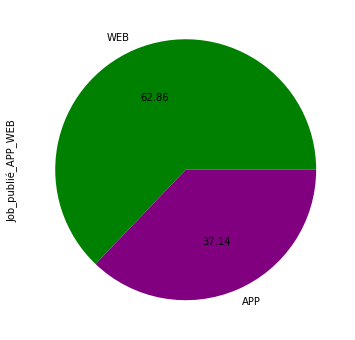

In [21]:
offres_2021["Job_publié_APP_WEB"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

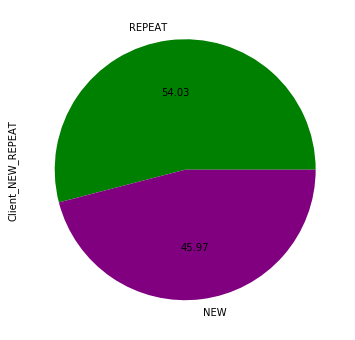

In [22]:
offres_2021["Client_NEW_REPEAT"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

In [23]:
X = "Job_publié_APP_WEB" 
Y = "Client_NEW_REPEAT" 

Client_NEW_REPEAT = offres_2021[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Client_NEW_REPEAT = Client_NEW_REPEAT.div(Client_NEW_REPEAT.Total.values, axis=0)*100
Client_NEW_REPEAT

Client_NEW_REPEAT,NEW,REPEAT,Total
Job_publié_APP_WEB,,,
APP,27.184861,72.815139,100.0
WEB,57.069007,42.930993,100.0
Total,45.970149,54.029851,100.0


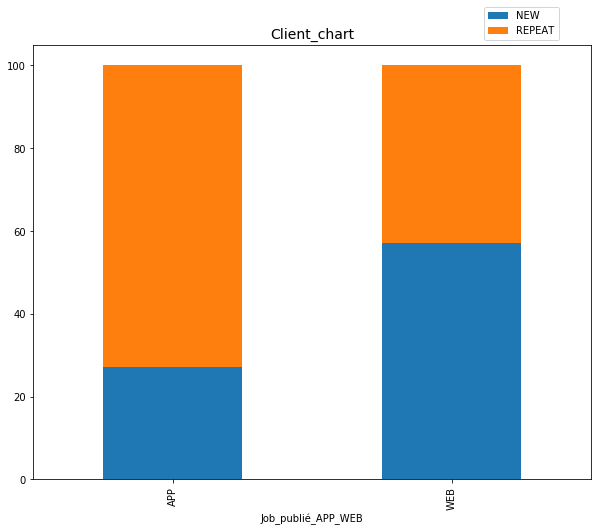

In [24]:
Client_chart = Client_NEW_REPEAT.copy()
Client_chart = Client_chart[['NEW', 'REPEAT']]
Client_chart.drop('Total', axis = 0, inplace = True)

Client_chart.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Client_chart',fontsize=14) 
plt.show()

### 2. Typologie client - Statut PAID

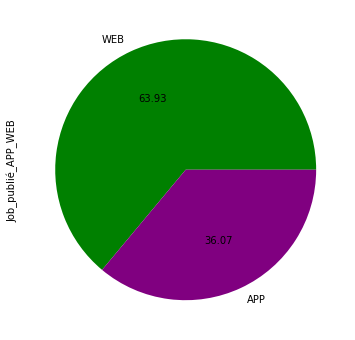

In [27]:
Statut_de_loffre_PAID = offres_2021 [ (offres_2021["Statut_de_loffre_PAID_CANCELED"] == "PAID")]
Statut_de_loffre_PAID["Job_publié_APP_WEB"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

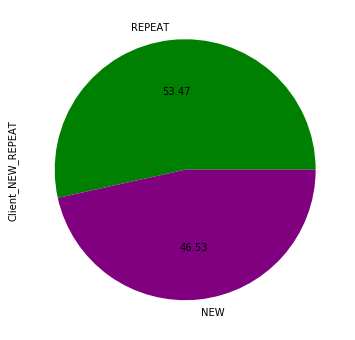

In [28]:
Statut_de_loffre_PAID["Client_NEW_REPEAT"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()


In [29]:
X = "Job_publié_APP_WEB" 
Y = "Client_NEW_REPEAT" 

Client_NEW_REPEAT_PAID = Statut_de_loffre_PAID[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Client_NEW_REPEAT_PAID = Client_NEW_REPEAT_PAID.div(Client_NEW_REPEAT_PAID.Total.values, axis=0)*100
Client_NEW_REPEAT_PAID

Client_NEW_REPEAT,NEW,REPEAT,Total
Job_publié_APP_WEB,,,
APP,26.767253,73.232747,100.0
WEB,57.685638,42.314362,100.0
Total,46.532957,53.467043,100.0


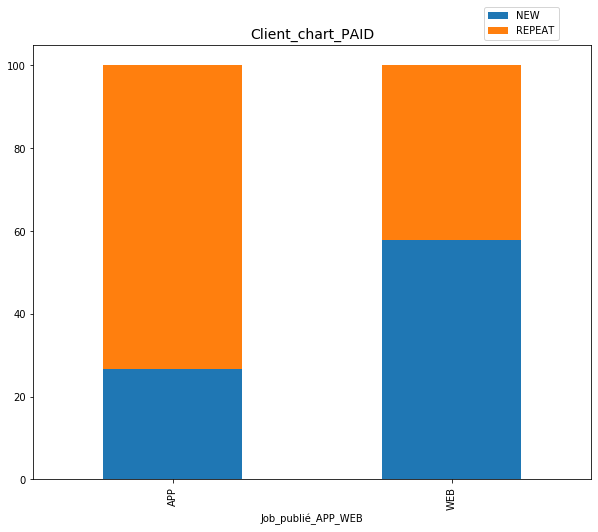

In [30]:
Client_chart_PAID = Client_NEW_REPEAT_PAID.copy()
Client_chart_PAID = Client_chart_PAID[['NEW', 'REPEAT']]
Client_chart_PAID.drop('Total', axis = 0, inplace = True)

Client_chart_PAID.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Client_chart_PAID',fontsize=14) 
plt.show()

### 3. Typologie client - Statut CANCELED


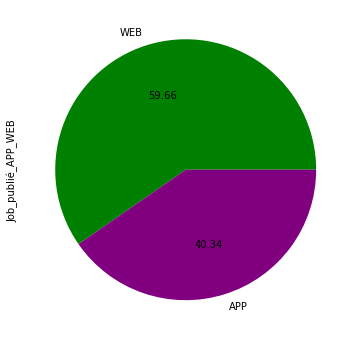

In [32]:
Statut_de_loffre_CANCELED = offres_2021 [ (offres_2021["Statut_de_loffre_PAID_CANCELED"] == "CANCELED")]
Statut_de_loffre_CANCELED["Job_publié_APP_WEB"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

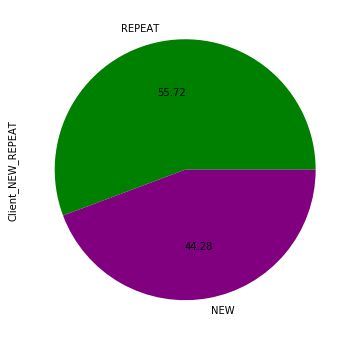

In [33]:
Statut_de_loffre_CANCELED["Client_NEW_REPEAT"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

In [34]:
X = "Job_publié_APP_WEB" 
Y = "Client_NEW_REPEAT" 

Client_NEW_REPEAT_CANCELED = Statut_de_loffre_CANCELED[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Client_NEW_REPEAT_CANCELED = Client_NEW_REPEAT_CANCELED.div(Client_NEW_REPEAT_CANCELED.Total.values, axis=0)*100
Client_NEW_REPEAT_CANCELED


Client_NEW_REPEAT,NEW,REPEAT,Total
Job_publié_APP_WEB,,,
APP,28.304006,71.695994,100.0
WEB,55.088608,44.911392,100.0
Total,44.283341,55.716659,100.0


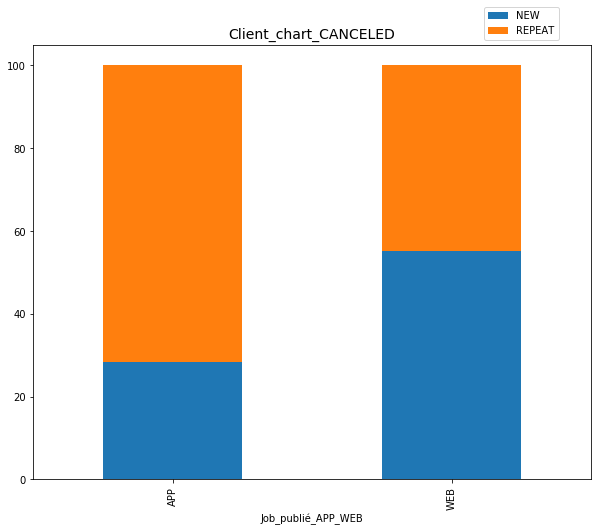

In [35]:
Client_chart_CANCELED = Client_NEW_REPEAT_CANCELED.copy()
Client_chart_CANCELED = Client_chart_CANCELED[['NEW', 'REPEAT']]
Client_chart_CANCELED.drop('Total', axis = 0, inplace = True)

Client_chart_CANCELED.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Client_chart_CANCELED',fontsize=14) 
plt.show()

## e. Anova Raison_dannulation - Bricolage - Ménages - Déménagement job CANCELED

In [37]:
X = "Catégorie" 
Y = "Raison_dannulation_num" 


jobs_annulés_stat = jobs_annulés[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
jobs_annulés_stat = jobs_annulés_stat.div(jobs_annulés_stat.Total.values, axis=0)*100
jobs_annulés_stat.drop('Total', axis=1, inplace=True)
jobs_annulés_stat = np.transpose(jobs_annulés_stat)
jobs_annulés_stat = jobs_annulés_stat[['Bricolage','Ménage','Déménagement']]
jobs_annulés_stat

brico_list = jobs_annulés_stat['Bricolage'].tolist()
Ménage_list = jobs_annulés_stat['Ménage'].tolist()
Déménagement_list = jobs_annulés_stat['Déménagement'].tolist()
jobs_annulés_stat


Catégorie,Bricolage,Ménage,Déménagement
Raison_dannulation_num,,,
1,0.947051,0.714853,0.678733
2,0.129143,0.079428,0.282805
3,25.010762,16.362192,22.058824
4,15.712441,9.928515,14.536199
5,0.602669,1.429706,0.791855
6,10.589755,23.431295,17.929864
7,5.165734,0.635425,3.054299
8,0.473526,1.111994,0.678733
9,3.013345,2.621128,11.029412


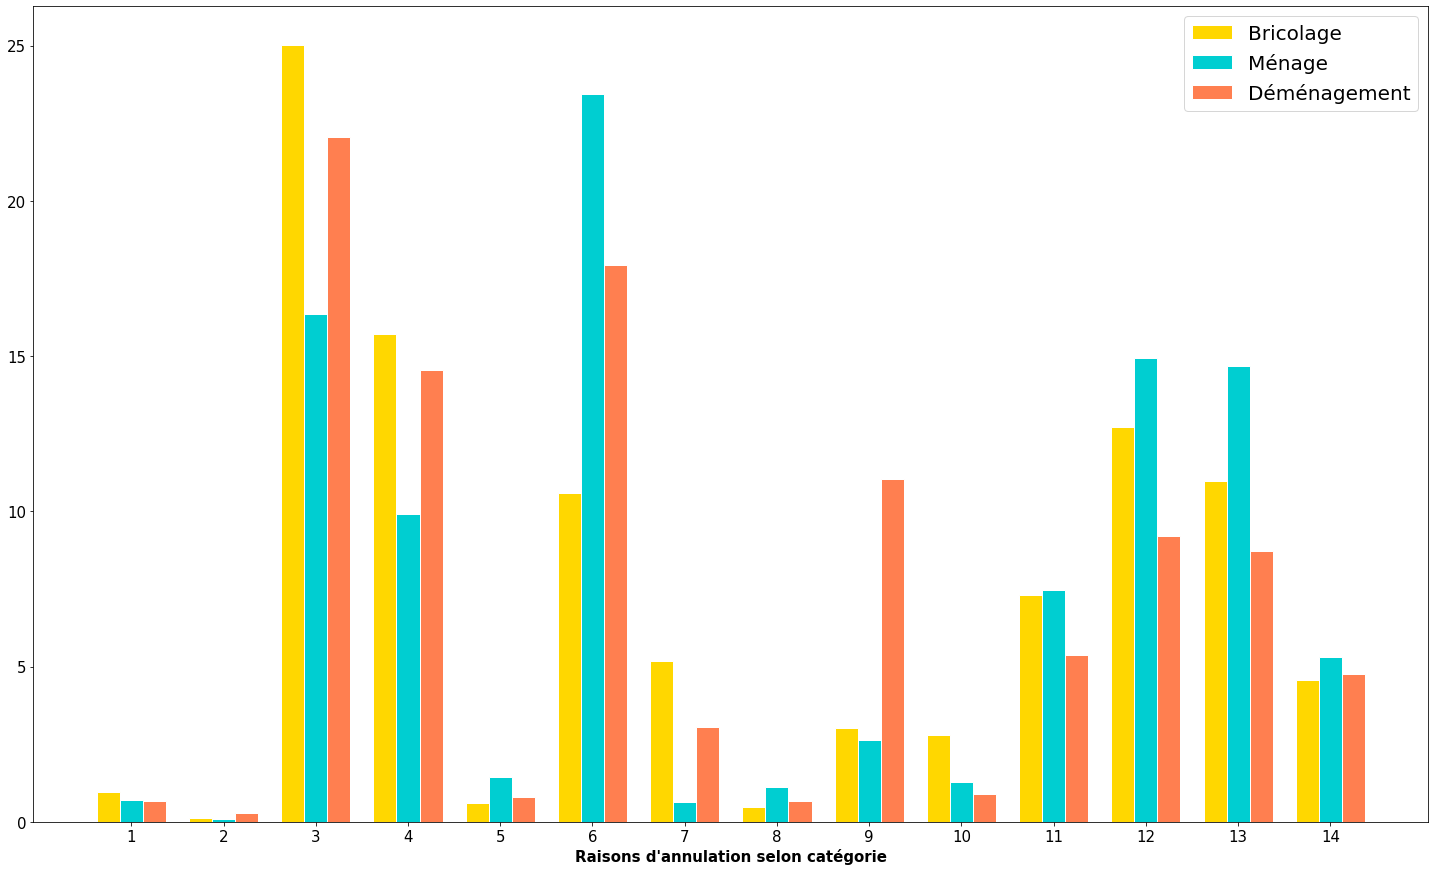

In [38]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = brico_list
bars2 = Ménage_list
bars3 = Déménagement_list

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
r12 = [x + barWidth for x in r11]
r13 = [x + barWidth for x in r12]
r14 = [x + barWidth for x in r13]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='Bricolage')
plt.bar(r2, bars2, color='darkturquoise', width=barWidth, edgecolor='white', label='Ménage')
plt.bar(r3, bars3, color='coral', width=barWidth, edgecolor='white', label='Déménagement')
 
# Add xticks on the middle of the group bars
plt.xlabel('Raisons d\'annulation selon catégorie', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['1','2','3','4', '5', '6','7','8','9','10','11','12','13','14','Total'])

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()


1: Le jobber a un comportement inapproprié   
2: Client supprimé  
3: J'ai trouvé une autre solution  
4: Je n'ai plus besoin du service  
5: Jobber supprimé  
6: Le jobber a annulé  
7: Le jobber demande un prix plus élevé  
8: Le jobber demande à être payé en direct  
9: Le jobber n'a pas le bon équipement  
10 : Le jobber n'a pas les compétences  
11 : Le jobber ne répond pas à mes appels / messages  
12 : Le jobber ne s'est pas présenté  
13 : Le jobber n’est pas disponible à la date convenue  
14 : Manipulation ADMIN  

# II. Jobs de bricolage

## a. Anova statut_de_l'offre - Bricolage

In [45]:
Bricolage = offres_2021 [ (offres_2021["Catégorie"] == "Bricolage")]

anova_Bricolage_statut = smf.ols('Statut_de_loffre_num ~ Prix_client + Prix_jobber + Jobs_réalisés_par_le_jobber + Nombre_doffres_faites_par_le_jobber + Distance_Job_Jobber_KM + Nombre_de_commentaires_sur_le_job + Note_jobber + Nombre_de_commentaires_du_jobber + Différence_prix + Différence_postulation_publication + Différence_réservation_postulation + Différence_Date_du_job_réservation + Différence_Date_du_job_publication + Job_publié_APP_WEB_num + Client_NEW_REPEAT_num', data=Bricolage).fit()
print(anova_Bricolage_statut.summary())

                             OLS Regression Results                             
Dep. Variable:     Statut_de_loffre_num   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.041
Method:                   Least Squares   F-statistic:                     32.46
Date:                  Wed, 03 Nov 2021   Prob (F-statistic):           3.61e-80
Time:                          12:08:14   Log-Likelihood:                -4638.6
No. Observations:                  9596   AIC:                             9305.
Df Residuals:                      9582   BIC:                             9406.
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [46]:
Bricolage_statut = Bricolage.copy()
Bricolage_statut.drop('ID_Client', axis = 1, inplace = True)
Bricolage_statut.drop('ID_Jobber', axis = 1, inplace = True)
Bricolage_statut.drop('Raison_dannulation_num', axis = 1, inplace = True)
Bricolage_statut.drop('Statut_de_loffre_num', axis = 1, inplace = True)
Bricolage_statut.drop('Catégorie_num', axis = 1, inplace = True)

Bricolage_statut = Bricolage_statut.groupby(['Statut_de_loffre_PAID_CANCELED']).mean()
Bricolage_statut

,Prix_client,Prix_jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Nombre_de_commentaires_sur_le_job,Note_jobber,Nombre_de_commentaires_du_jobber,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num
Statut_de_loffre_PAID_CANCELED,,,,,,,,,,,,,,,
CANCELED,72.946406,85.186827,50.938442,483.995265,28.571623,7.452863,4.899275,755.134740,12.240422,0.724925,0.248386,5.604821,5.604821,0.410676,0.563495
PAID,62.261110,72.037702,83.031883,655.898291,18.921061,5.840466,4.916795,1032.144866,9.776591,0.665778,0.199176,4.044854,4.044854,0.344890,0.516669


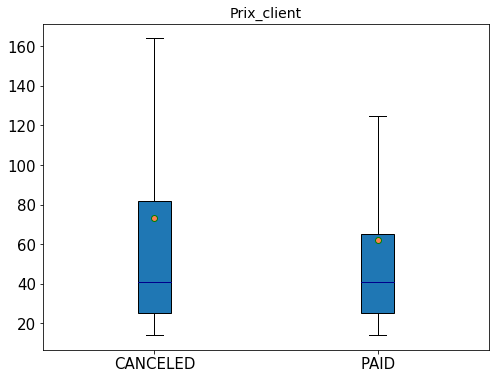

In [47]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Prix_client" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Prix_client',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

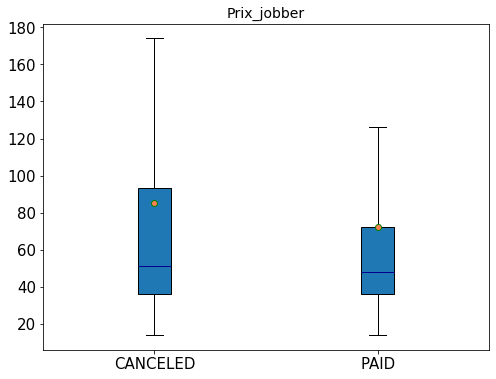

In [48]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Prix_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Prix_jobber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

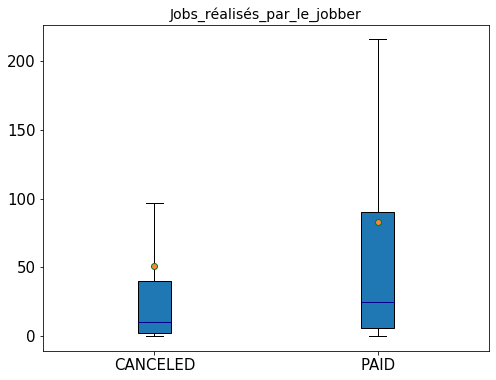

In [49]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Jobs_réalisés_par_le_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Jobs_réalisés_par_le_jobber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

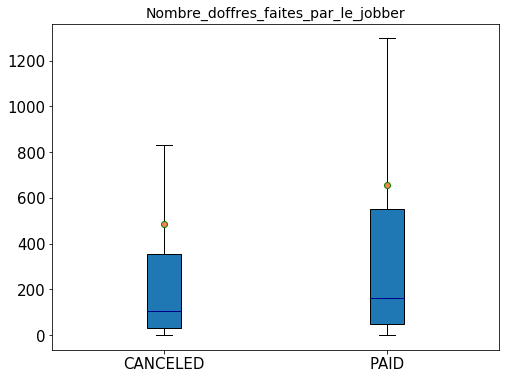

In [50]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Nombre_doffres_faites_par_le_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Nombre_doffres_faites_par_le_jobber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

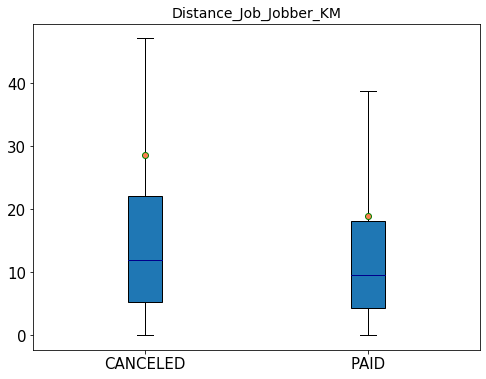

In [51]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Distance_Job_Jobber_KM" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Distance_Job_Jobber_KM',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

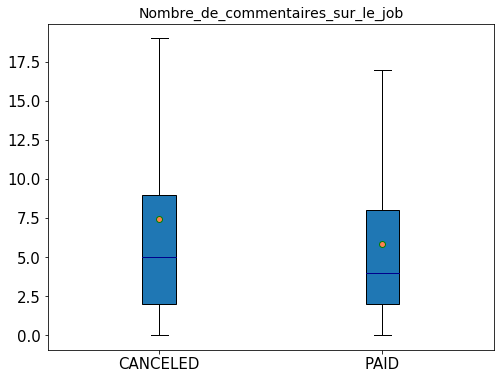

In [52]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Nombre_de_commentaires_sur_le_job" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Nombre_de_commentaires_sur_le_job',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

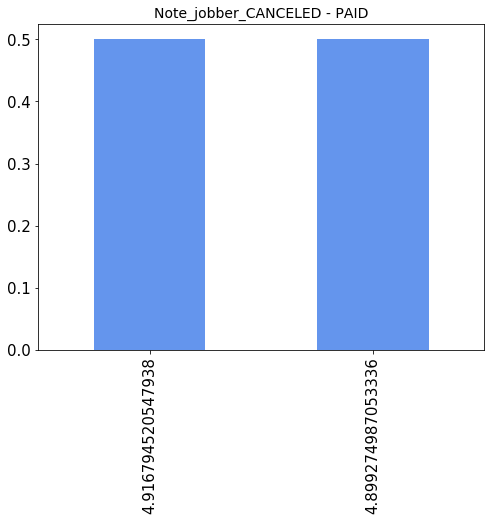

In [94]:
plt.figure(figsize=(8, 6))
plt.title('Note_jobber_CANCELED - PAID',fontsize=14) 
Bricolage_statut["Note_jobber"].value_counts(normalize=True).plot(kind='bar', color='cornflowerblue')
plt.show()

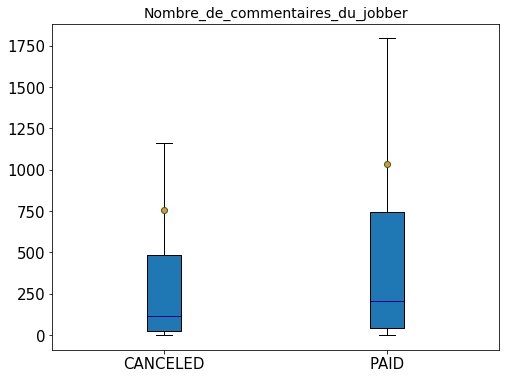

In [54]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Nombre_de_commentaires_du_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Nombre_de_commentaires_du_jobber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

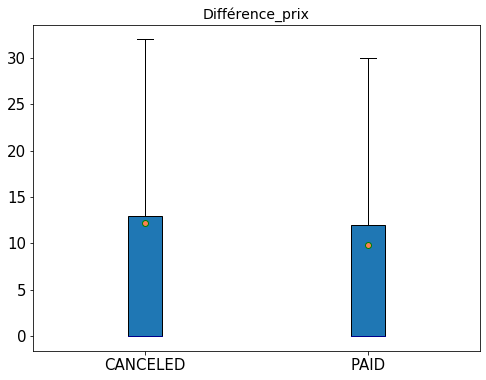

In [55]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Différence_prix" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Différence_prix',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

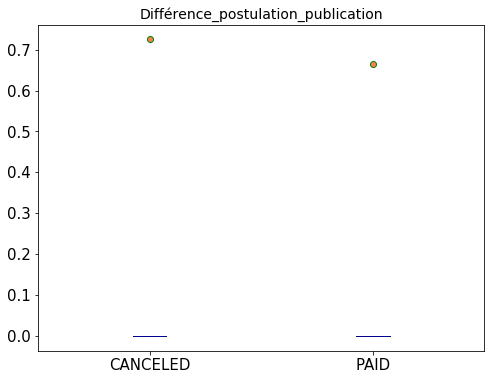

In [56]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Différence_postulation_publication" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Différence_postulation_publication',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

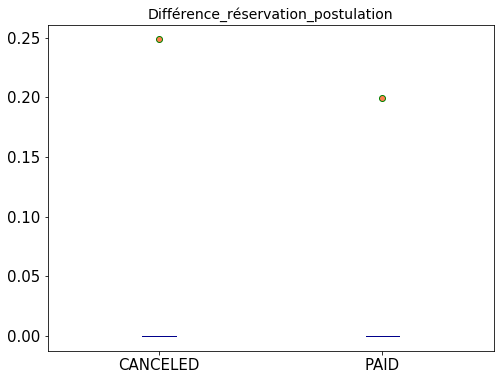

In [57]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Différence_réservation_postulation" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Différence_réservation_postulation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

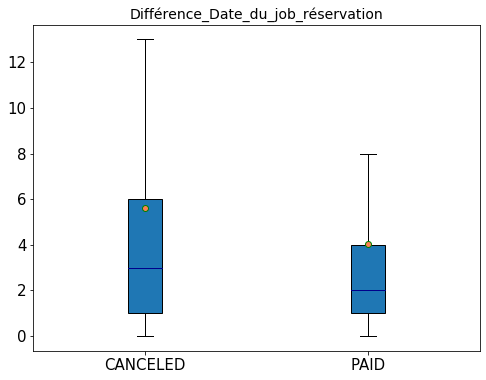

In [58]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Différence_Date_du_job_réservation" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Différence_Date_du_job_réservation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

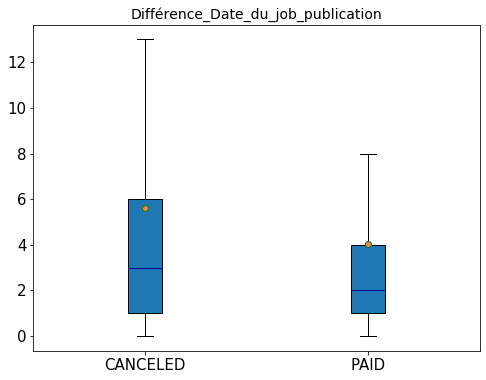

In [59]:
X = "Statut_de_loffre_PAID_CANCELED" # qualitative
Y = "Différence_Date_du_job_publication" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('Différence_Date_du_job_publication',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

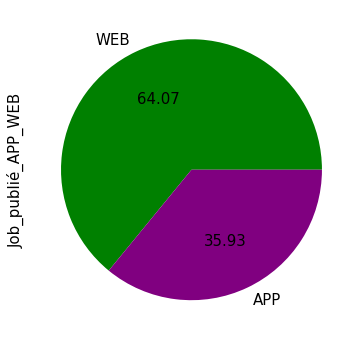

In [60]:
Bricolage["Job_publié_APP_WEB"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

In [61]:
X = "Statut_de_loffre_PAID_CANCELED" 
Y = "Job_publié_APP_WEB" 

Job_publié = Bricolage[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Job_publié = Job_publié.div(Job_publié.Total.values, axis=0)*100
Job_publié

Job_publié_APP_WEB,APP,WEB,Total
Statut_de_loffre_PAID_CANCELED,,,
CANCELED,41.067585,58.932415,100.0
PAID,34.489029,65.510971,100.0
Total,35.934544,64.065456,100.0


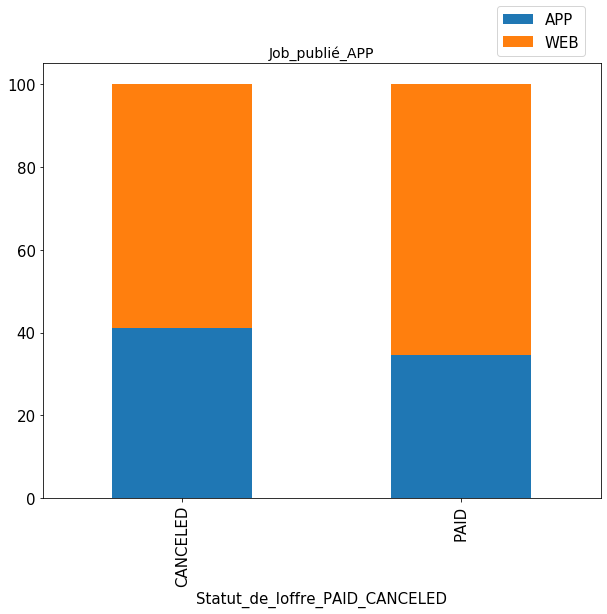

In [62]:
Job_publié_APP = Job_publié.copy()
Job_publié_APP = Job_publié_APP[['APP', 'WEB']]
Job_publié_APP.drop('Total', axis = 0, inplace = True)

Job_publié_APP.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Job_publié_APP',fontsize=14) 
plt.show()

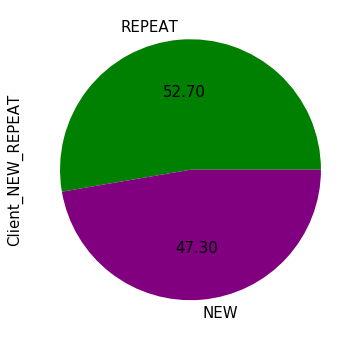

In [63]:
Bricolage["Client_NEW_REPEAT"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['green', 'purple'], autopct = '%.2f')
plt.show()

In [64]:
X = "Statut_de_loffre_PAID_CANCELED" 
Y = "Client_NEW_REPEAT" 

Client_publié = Bricolage[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Client_publié = Client_publié.div(Client_publié.Total.values, axis=0)*100
Client_publié

Client_NEW_REPEAT,NEW,REPEAT,Total
Statut_de_loffre_PAID_CANCELED,,,
CANCELED,43.650452,56.349548,100.0
PAID,48.333131,51.666869,100.0
Total,47.304200,52.695800,100.0


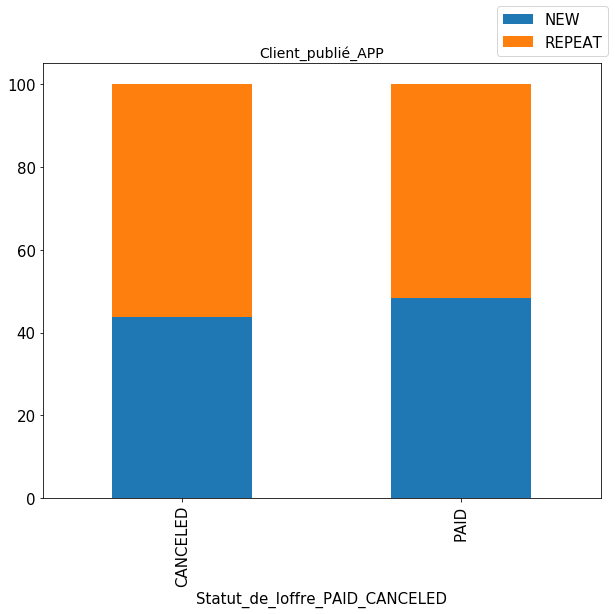

In [65]:
Client_publié_APP = Client_publié.copy()
Client_publié_APP = Client_publié_APP[['NEW', 'REPEAT']]
Client_publié_APP.drop('Total', axis = 0, inplace = True)

Client_publié_APP.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Client_publié_APP',fontsize=14) 
plt.show()

In [66]:
X = "Job_publié_APP_WEB" 
Y = "Client_NEW_REPEAT" 

Client_NEW_APP_BRICO = Bricolage[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Client_NEW_APP_BRICO = Client_NEW_APP_BRICO.div(Client_NEW_APP_BRICO.Total.values, axis=0)*100
Client_NEW_APP_BRICO

Client_NEW_REPEAT,NEW,REPEAT,Total
Job_publié_APP_WEB,,,
APP,29.613056,70.386944,100.0
WEB,57.227226,42.772774,100.0
Total,47.304200,52.695800,100.0


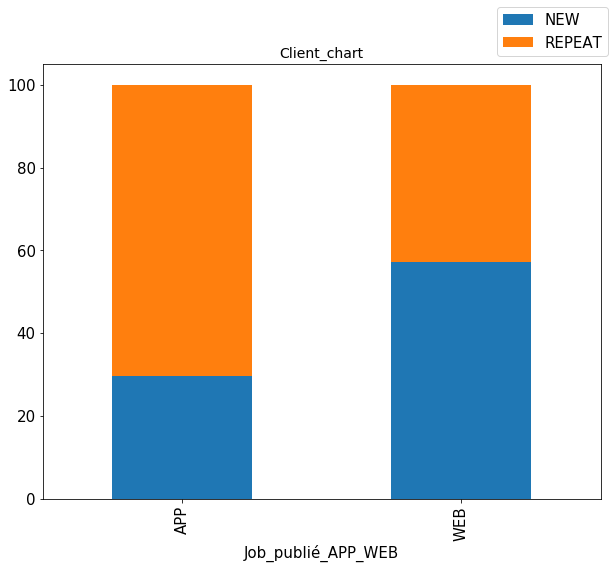

In [67]:
Client_chart_BRICO = Client_NEW_APP_BRICO.copy()
Client_chart_BRICO = Client_chart_BRICO[['NEW', 'REPEAT']]
Client_chart_BRICO.drop('Total', axis = 0, inplace = True)

Client_chart_BRICO.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('Client_chart',fontsize=14) 
plt.show()

## B. Anova Raisons d'annulation - Bricolage

In [68]:
Bricolage_annulés = Bricolage.copy()
Bricolage_annulés = Bricolage_annulés [ (Bricolage_annulés["Statut_de_loffre_PAID_CANCELED"] == "CANCELED")]
Bricolage_annulés

,Prix_client,Prix_jobber,Raison_dannulation,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Date_postulation,Date_publication_du_job,Date_réservation,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
5,153.5,153.5,Client supprimé,1033845,1025584,2,46,16.74,Hauts-de-Seine,Bricolage,Peinture intérieure,NEW,WEB,2021-07-31 22:08:00,2021-08-01 04:56:00,2021-08-05 23:11:00,2021-08-09,2021-10-02,2021-07-21,25,OUI,5.00,112,CANCELED,2021-08-01,2021-07-31,2021-08-05,0.0,0,4,9,9,2,1,0,0,3
11,144.0,144.0,Je n'ai plus besoin du service,1026512,1020679,2,15,7.88,Val-d'Oise,Bricolage,Réparation meuble,NEW,WEB,2021-08-01 05:03:00,2021-08-01 06:43:00,2021-08-01 07:22:00,2021-08-07,2021-08-08,2021-07-14,8,OUI,5.00,27,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,6,6,4,1,0,0,3
16,51.0,51.0,Le jobber demande un prix plus élevé,678724,968245,10,136,20.42,Hauts-de-Seine,Bricolage,Assemblage de meubles,REPEAT,WEB,2021-08-01 07:06:00,2021-08-01 07:13:00,2021-08-01 07:20:00,2021-08-01,2021-08-01,2021-10-05,9,OUI,4.78,237,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,0,0,7,1,0,1,3
31,304.5,304.5,Je n'ai plus besoin du service,1033901,363668,1,97,1.73,Drôme,Bricolage,Peinture intérieure,NEW,APP,2021-08-01 06:15:00,2021-08-01 08:09:00,2021-08-01 12:01:00,2021-08-06,2021-08-01,2017-01-31,3,OUI,NaN,115,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,5,5,4,1,1,0,3
32,22.0,22.0,Le jobber n’est pas disponible à la date convenue,1033894,970962,0,52,5.67,Var,Bricolage,Pose de tringles à rideaux,NEW,WEB,2021-08-01 05:13:00,2021-08-01 08:13:00,2021-08-03 09:50:00,2021-08-03,2021-08-03,2021-11-05,7,NON,NaN,0,CANCELED,2021-08-01,2021-08-01,2021-08-03,0.0,0,2,2,2,13,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26440,119.0,119.0,J'ai trouvé une autre solution,1058794,1083798,0,5,20.11,Vaucluse,Bricolage,Démontage de meubles,REPEAT,APP,2021-10-15 17:39:00,2021-10-15 17:49:00,2021-10-15 17:51:00,2021-10-20,2021-10-16,2021-08-10,3,NON,NaN,0,CANCELED,2021-10-15,2021-10-15,2021-10-15,0.0,0,0,5,5,3,1,1,1,3
26448,432.0,480.0,Le jobber n'a pas le bon équipement,488611,1038435,8,77,19.46,Haute-Savoie,Bricolage,Autre job de rénovation,REPEAT,APP,2021-10-15 14:33:00,2021-10-15 18:31:00,2021-10-16 06:38:00,2021-10-22,2021-10-16,2021-06-08,4,OUI,4.86,87,CANCELED,2021-10-15,2021-10-15,2021-10-16,48.0,0,0,7,7,9,1,1,1,3
26449,44.0,84.0,Je n'ai plus besoin du service,1089034,360498,156,2252,18.66,Val-de-Marne,Bricolage,Autre job d'électricité,NEW,WEB,2021-10-15 17:55:00,2021-10-15 18:33:00,2021-10-15 18:47:00,2021-10-18,2021-10-18,2017-12-01,4,OUI,4.90,3807,CANCELED,2021-10-15,2021-10-15,2021-10-15,40.0,0,0,3,3,4,1,0,0,3
26453,44.0,44.0,Le jobber a annulé,1039999,1085212,1,43,49.07,Bouches-du-Rhône,Bricolage,Autre job d'aménagement,REPEAT,APP,2021-10-15 09:13:00,2021-10-15 18:46:00,2021-10-16 10:17:00,2021-10-22,2021-10-16,2021-10-10,1,NON,5.00,0,CANCELED,2021-10-15,2021-10-15,2021-10-16,0.0,0,0,7,7,6,1,1,1,3


In [69]:
anova_Bricolage_annulés = smf.ols('Raison_dannulation_num ~ Prix_client + Prix_jobber + Jobs_réalisés_par_le_jobber + Nombre_doffres_faites_par_le_jobber + Distance_Job_Jobber_KM + Nombre_de_commentaires_sur_le_job + Note_jobber + Nombre_de_commentaires_du_jobber + Différence_prix + Différence_postulation_publication + Différence_réservation_postulation + Différence_Date_du_job_réservation + Différence_Date_du_job_publication + Job_publié_APP_WEB_num + Client_NEW_REPEAT_num', data=Bricolage_annulés).fit()
print(anova_Bricolage_annulés.summary())


                              OLS Regression Results                              
Dep. Variable:     Raison_dannulation_num   R-squared:                       0.020
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     3.065
Date:                    Wed, 03 Nov 2021   Prob (F-statistic):           0.000163
Time:                            12:08:27   Log-Likelihood:                -5450.0
No. Observations:                    1931   AIC:                         1.093e+04
Df Residuals:                        1917   BIC:                         1.101e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

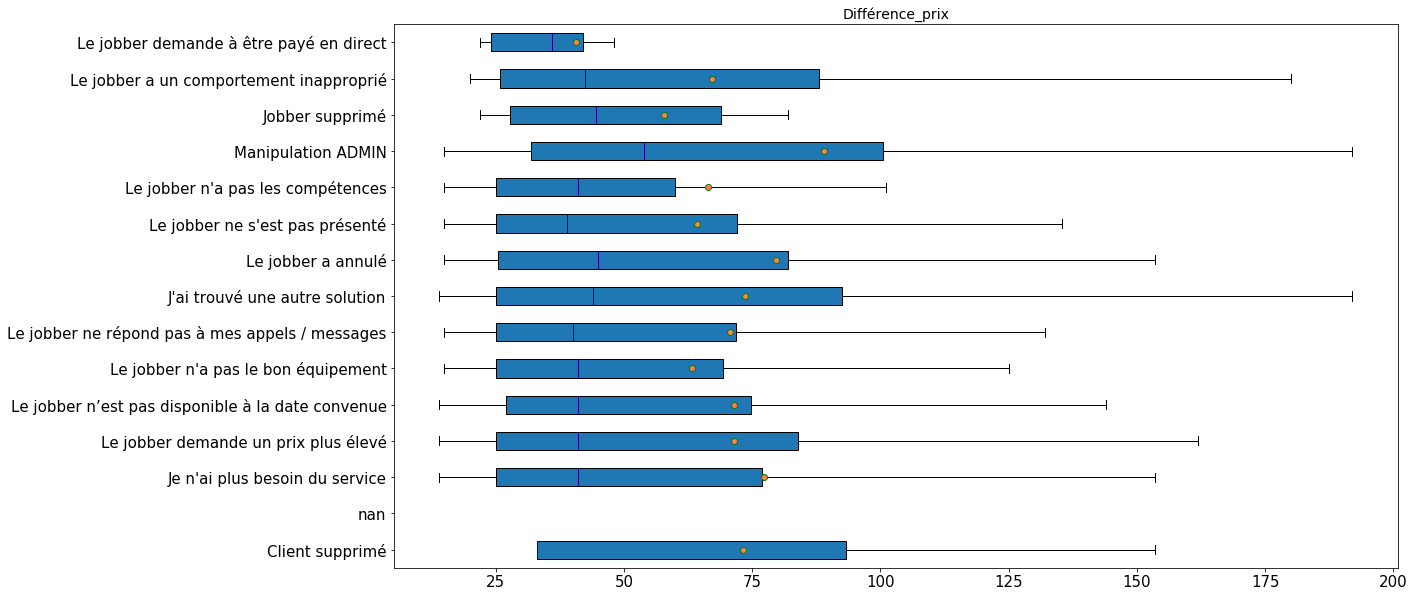

In [70]:
X = "Raison_dannulation" # qualitative
Y = "Prix_client" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_prix',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

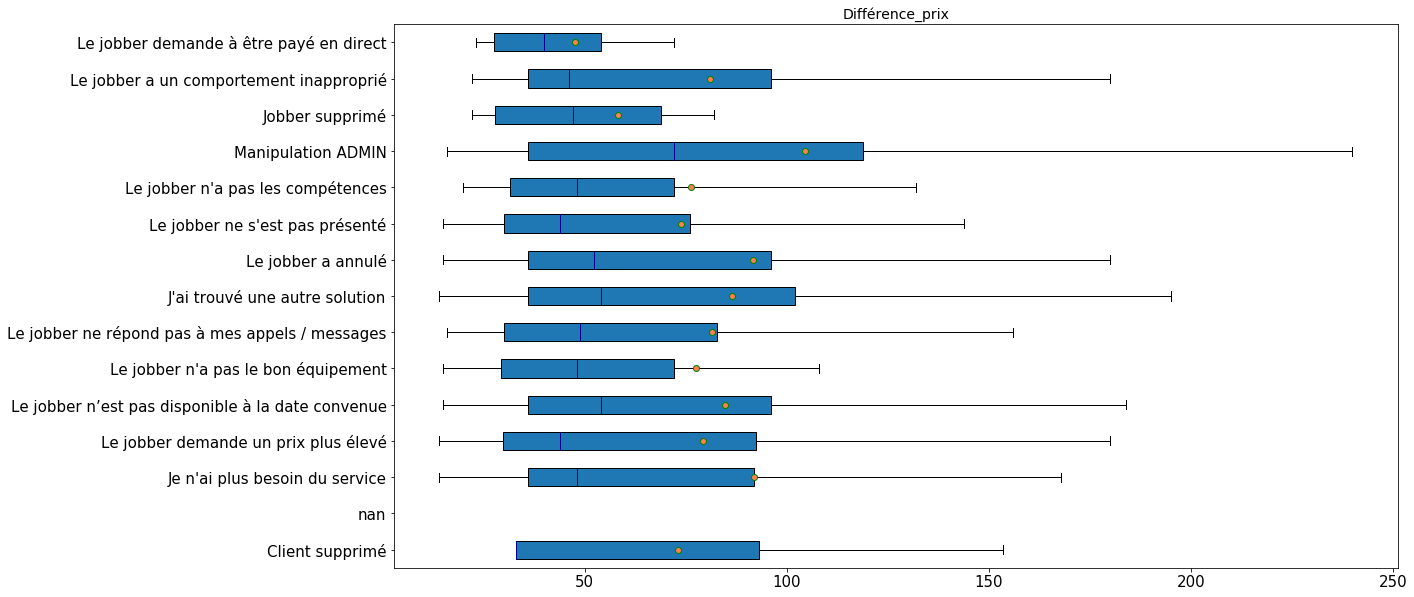

In [71]:
X = "Raison_dannulation" # qualitative
Y = "Prix_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_prix',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

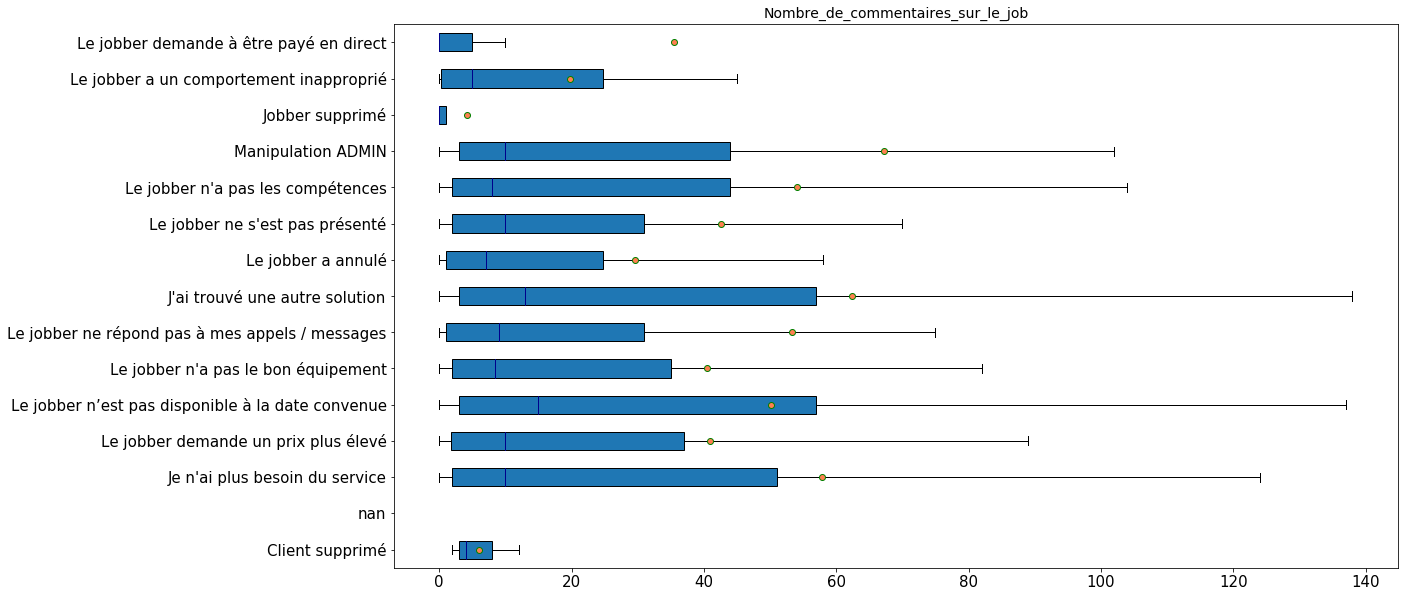

In [72]:
X = "Raison_dannulation" # qualitative
Y = "Jobs_réalisés_par_le_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Nombre_de_commentaires_sur_le_job',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

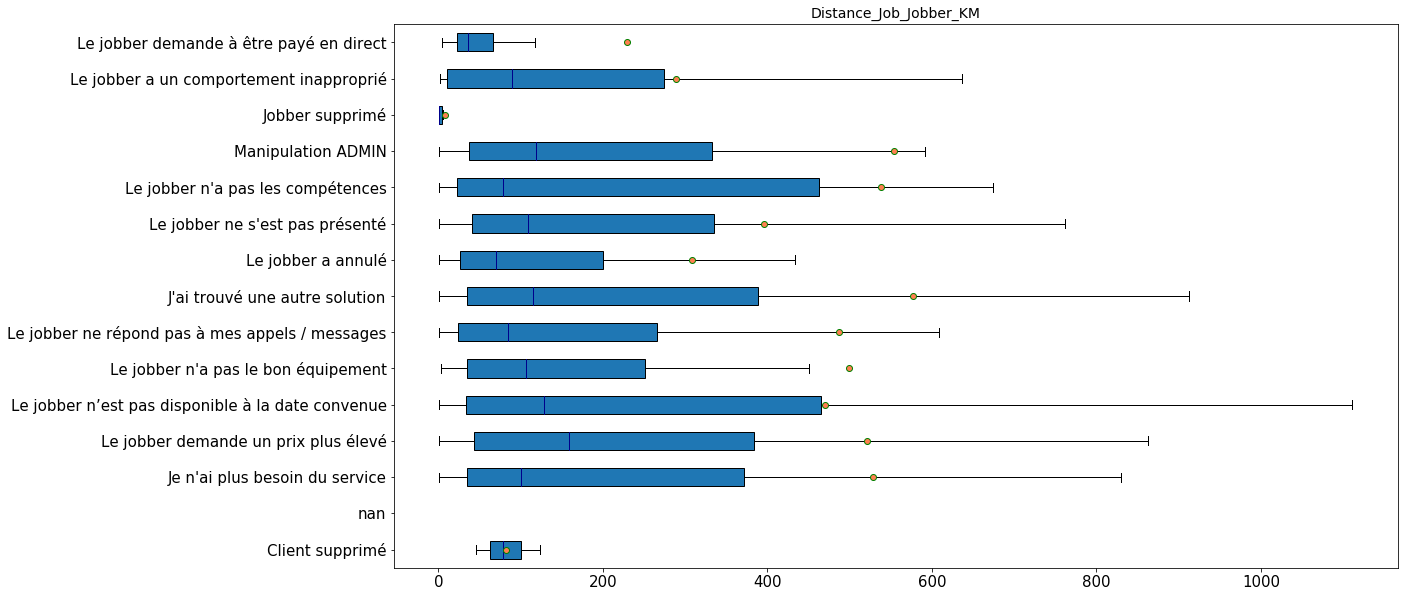

In [73]:
X = "Raison_dannulation" # qualitative
Y = "Nombre_doffres_faites_par_le_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Distance_Job_Jobber_KM',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

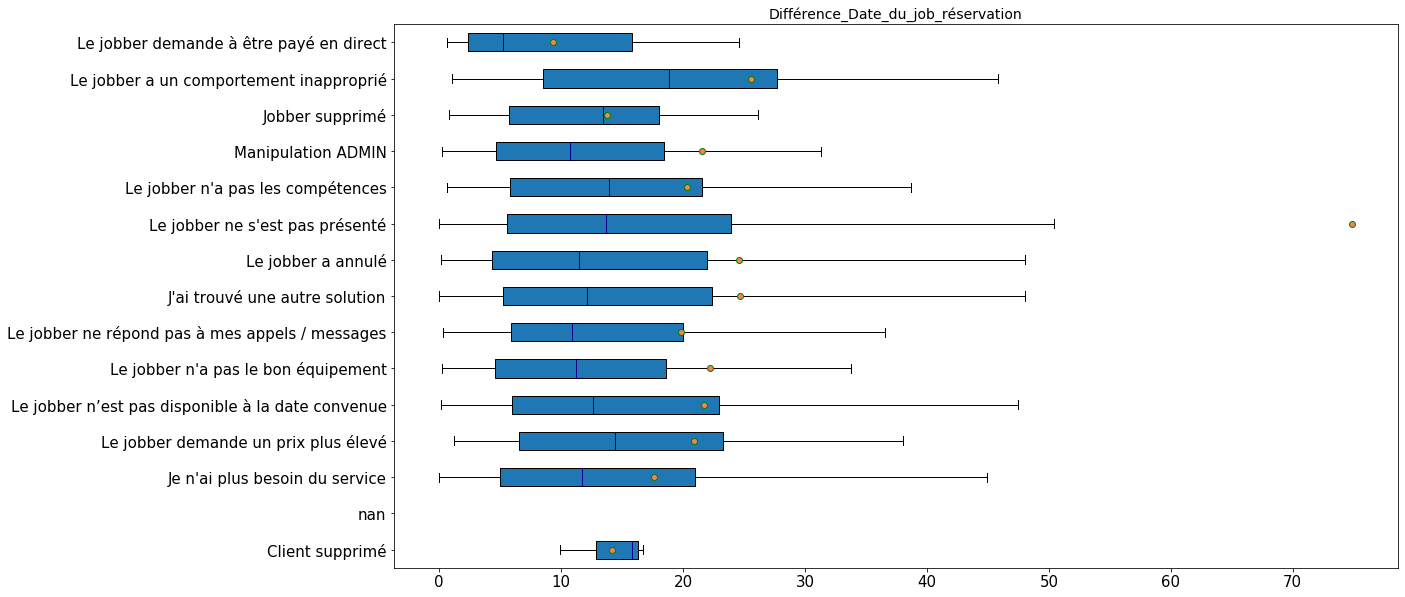

In [74]:
X = "Raison_dannulation" # qualitative
Y = "Distance_Job_Jobber_KM" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_Date_du_job_réservation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

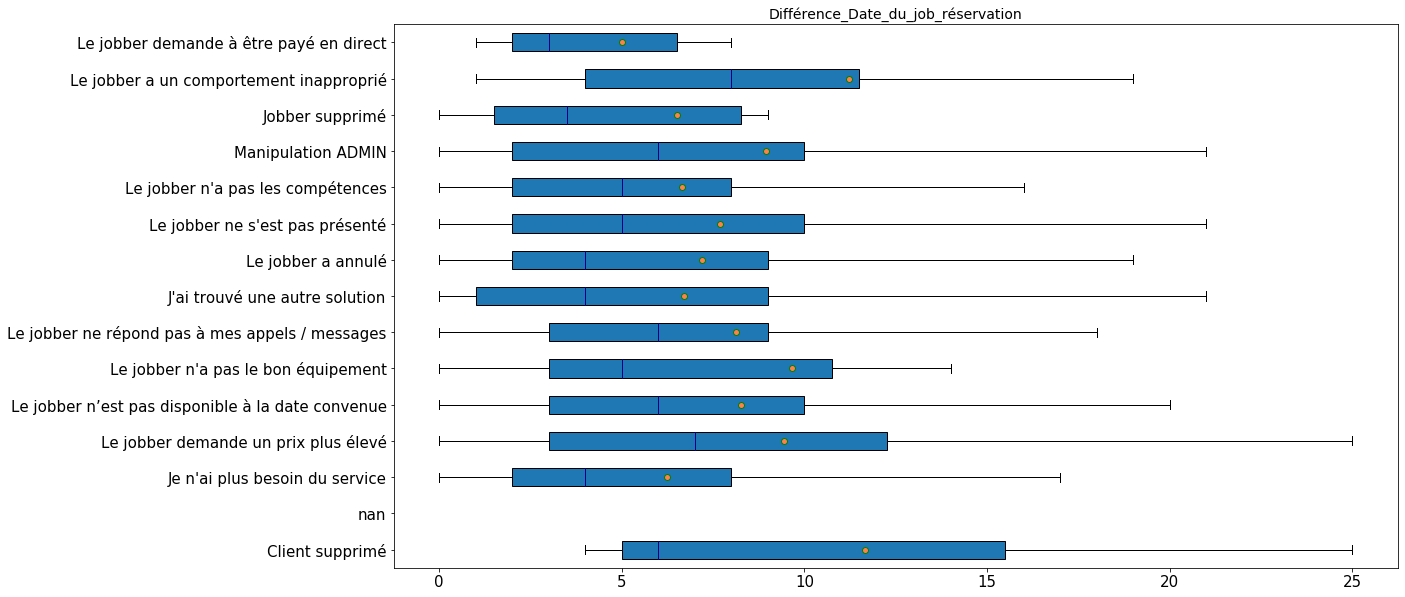

In [75]:
X = "Raison_dannulation" # qualitative
Y = "Nombre_de_commentaires_sur_le_job" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_Date_du_job_réservation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


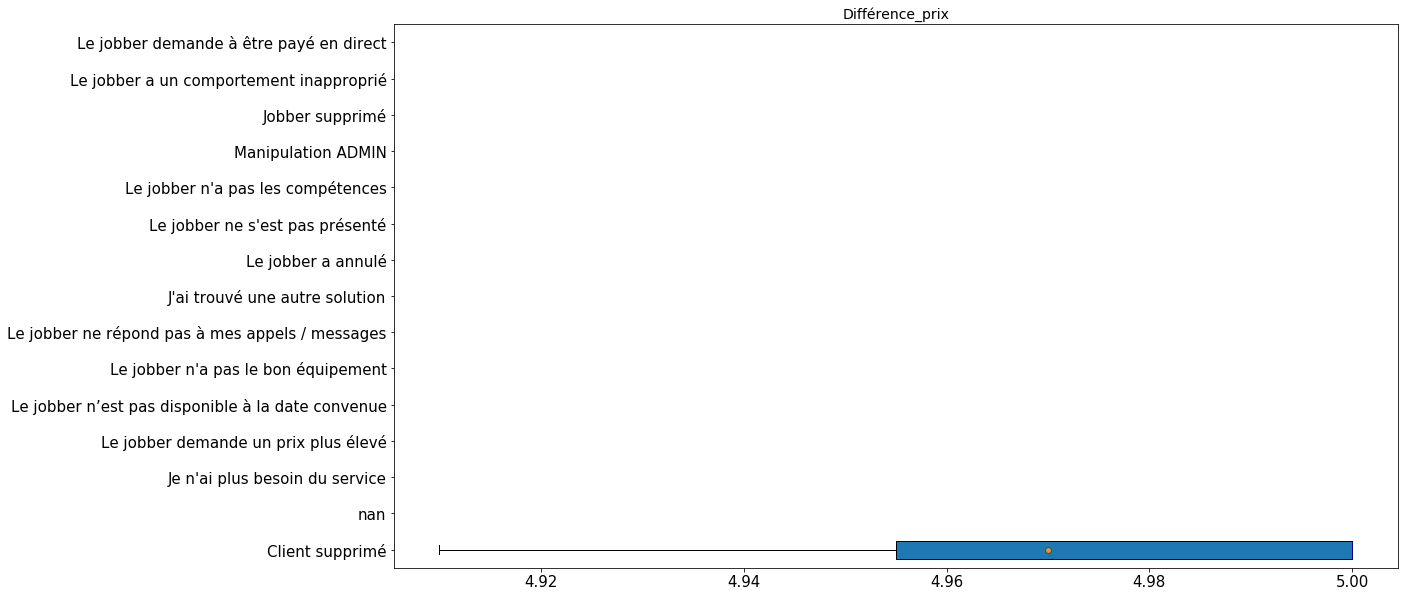

In [76]:
X = "Raison_dannulation" # qualitative
Y = "Note_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_prix',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

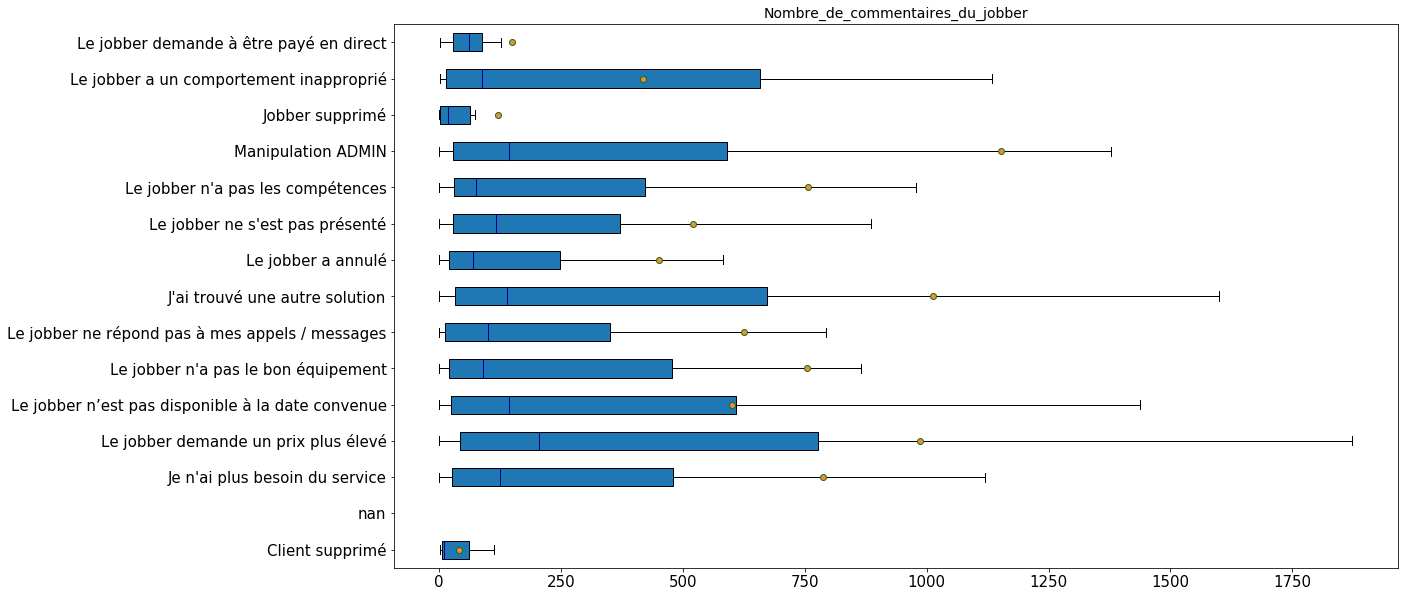

In [77]:
X = "Raison_dannulation" # qualitative
Y = "Nombre_de_commentaires_du_jobber" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Nombre_de_commentaires_du_jobber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

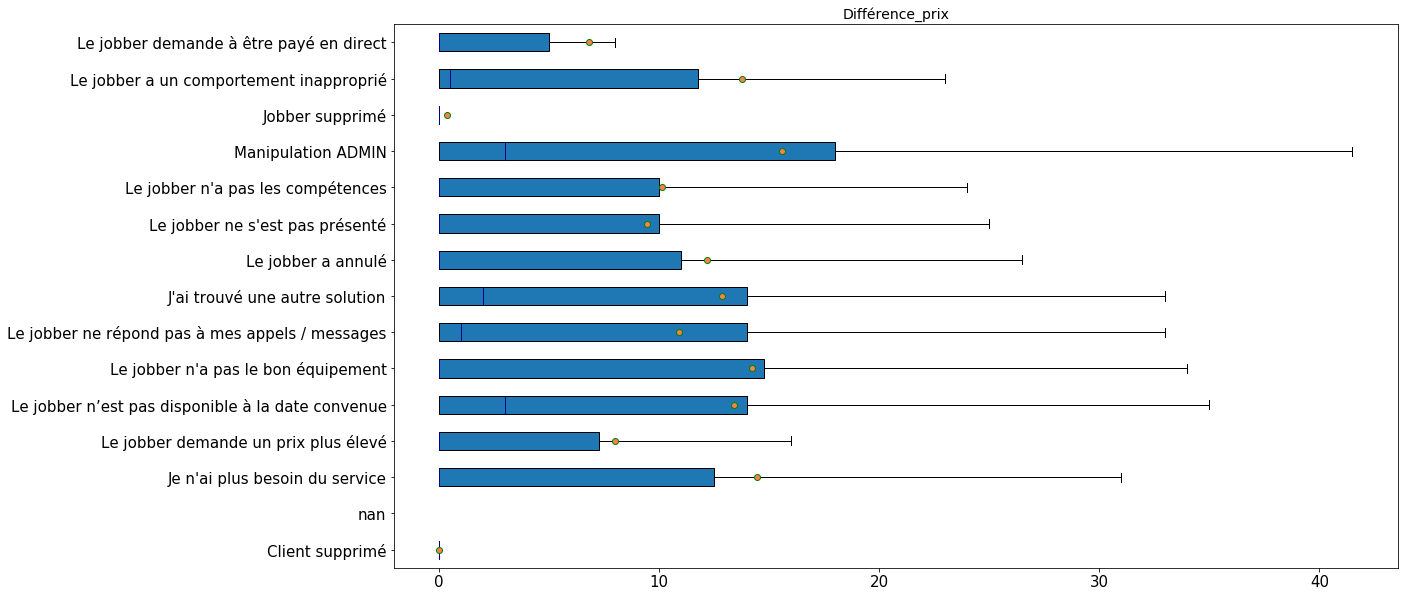

In [78]:
X = "Raison_dannulation" # qualitative
Y = "Différence_prix" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_prix',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

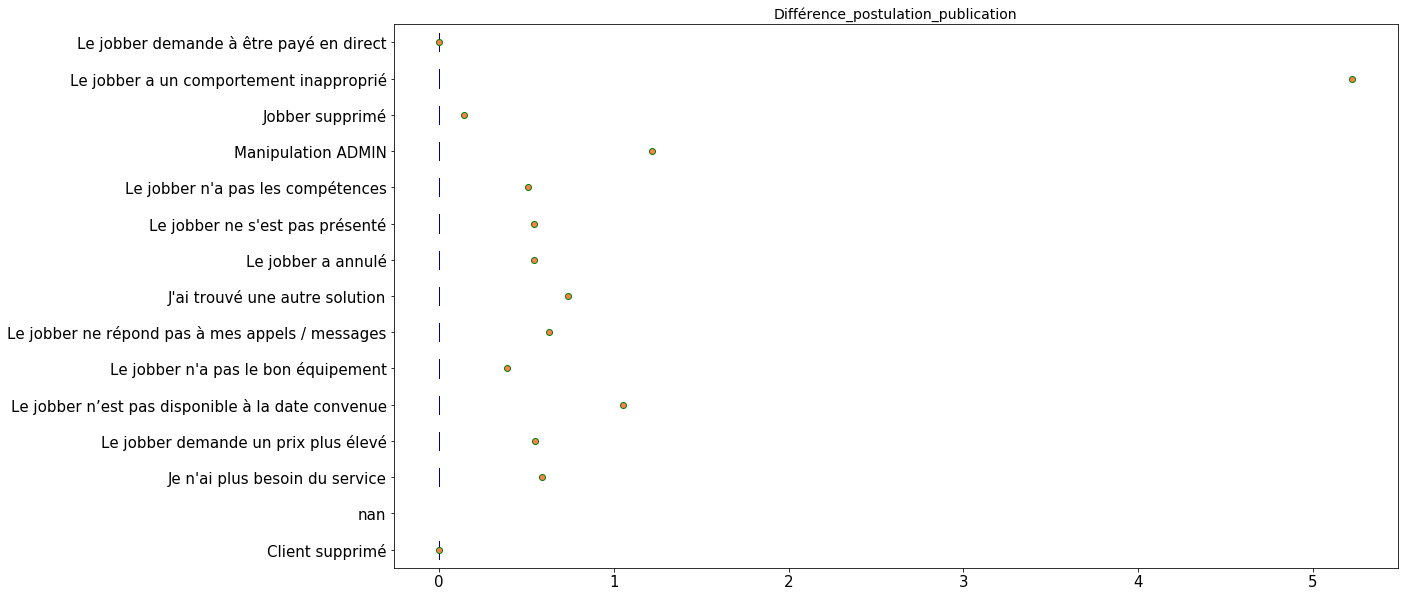

In [79]:
X = "Raison_dannulation" # qualitative
Y = "Différence_postulation_publication" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_postulation_publication',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

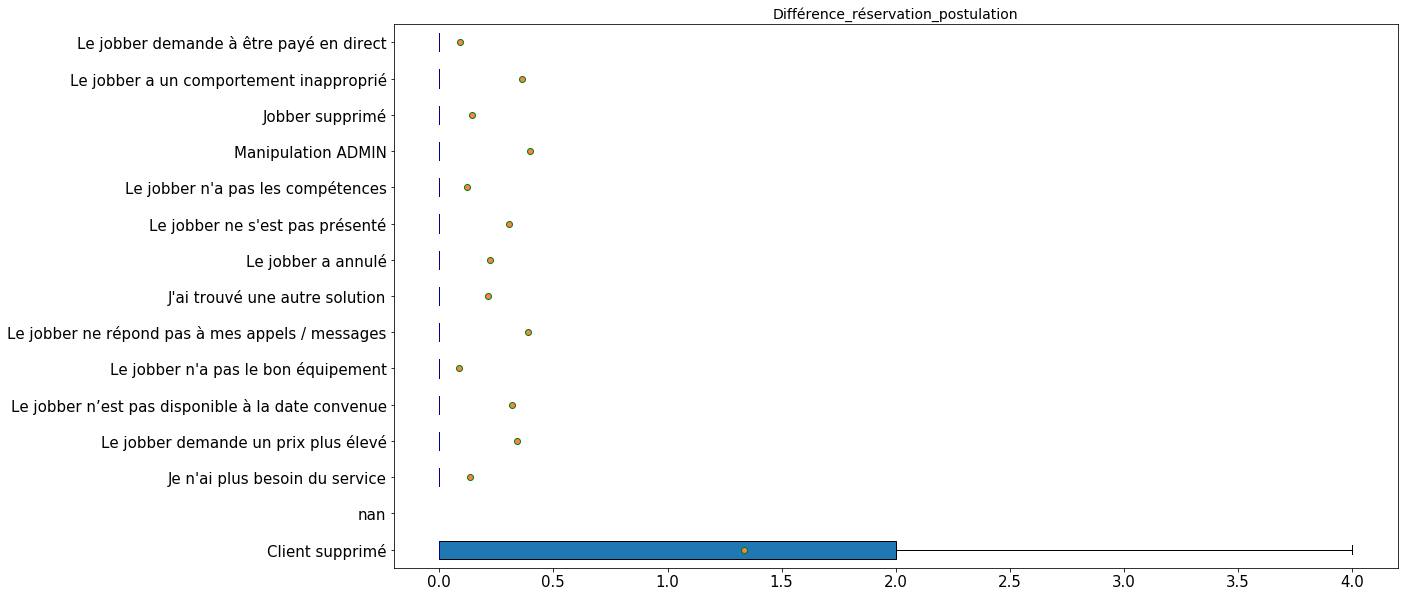

In [80]:
X = "Raison_dannulation" # qualitative
Y = "Différence_réservation_postulation" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_réservation_postulation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

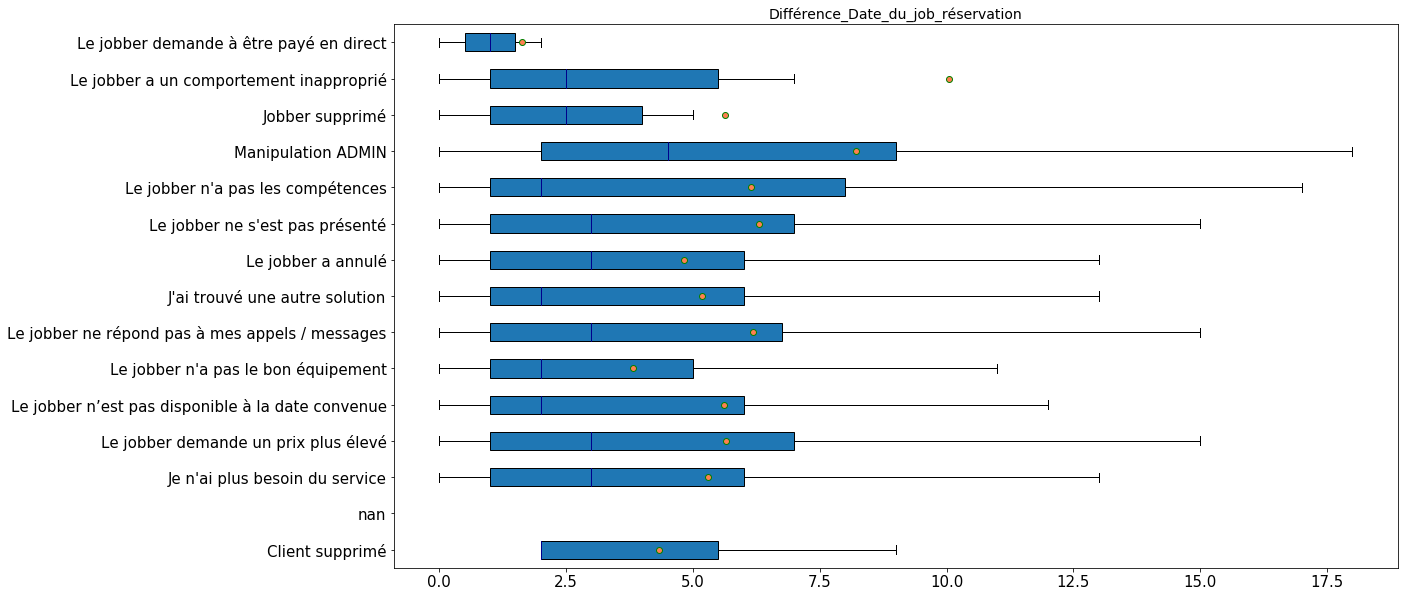

In [81]:
X = "Raison_dannulation" # qualitative
Y = "Différence_Date_du_job_réservation" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_Date_du_job_réservation',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

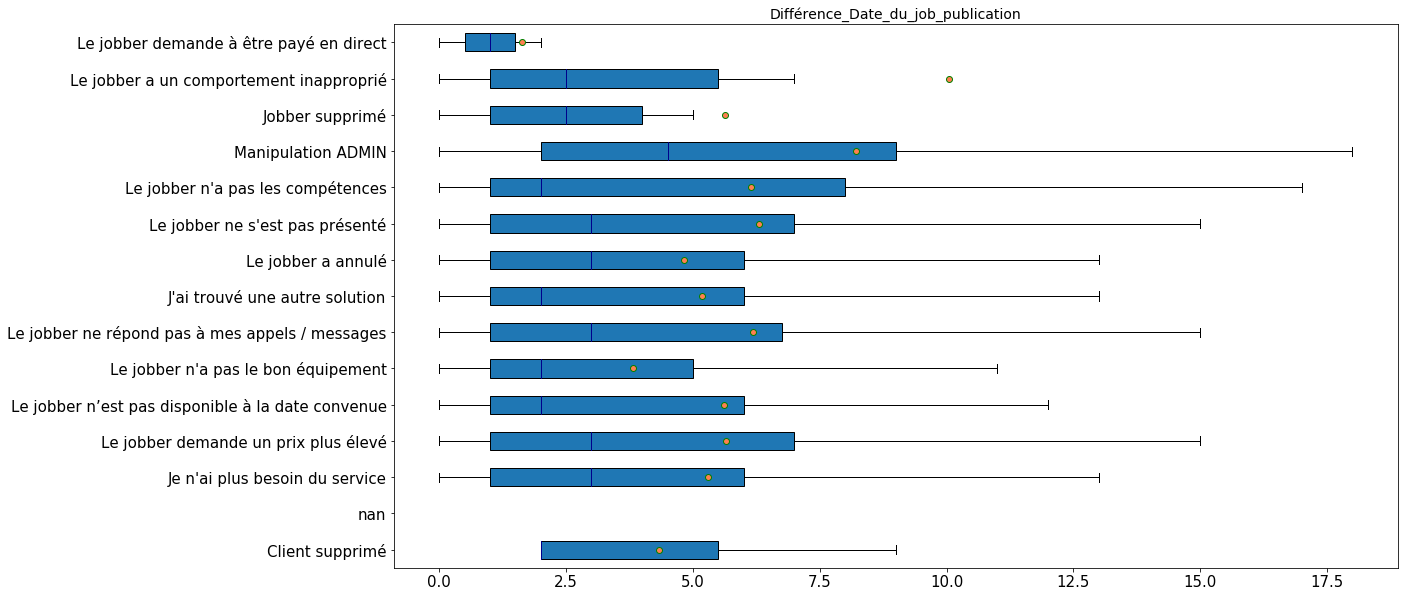

In [82]:
X = "Raison_dannulation" # qualitative
Y = "Différence_Date_du_job_publication" # quantitative

modalites = Bricolage[X].unique()
groupes = []
for m in modalites:
    groupes.append(Bricolage[Bricolage[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(18, 10))
plt.title('Différence_Date_du_job_publication',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### a. Typologie client Annulation cause JOBBER - BRICO 

In [83]:
Bricolage_jobber = Bricolage.copy()
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Statut_de_loffre_PAID_CANCELED"] == "CANCELED")]
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Raison_dannulation"] != "Manipulation ADMIN")]
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Raison_dannulation"] != "Autre")]
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Raison_dannulation"] != "Je n'ai plus besoin du service")]  
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Raison_dannulation"] != "J'ai trouvé une autre solution")]  
Bricolage_jobber = Bricolage_jobber [(Bricolage_jobber["Raison_dannulation"] != "Client supprimé")] 
Bricolage_jobber

,Prix_client,Prix_jobber,Raison_dannulation,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Date_postulation,Date_publication_du_job,Date_réservation,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
16,51.0,51.0,Le jobber demande un prix plus élevé,678724,968245,10,136,20.42,Hauts-de-Seine,Bricolage,Assemblage de meubles,REPEAT,WEB,2021-08-01 07:06:00,2021-08-01 07:13:00,2021-08-01 07:20:00,2021-08-01,2021-08-01,2021-10-05,9,OUI,4.78,237,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,0,0,7,1,0,1,3
32,22.0,22.0,Le jobber n’est pas disponible à la date convenue,1033894,970962,0,52,5.67,Var,Bricolage,Pose de tringles à rideaux,NEW,WEB,2021-08-01 05:13:00,2021-08-01 08:13:00,2021-08-03 09:50:00,2021-08-03,2021-08-03,2021-11-05,7,NON,NaN,0,CANCELED,2021-08-01,2021-08-01,2021-08-03,0.0,0,2,2,2,13,1,0,0,3
43,384.0,576.0,Le jobber n’est pas disponible à la date convenue,1033316,717312,30,130,2.00,Haute-Garonne,Bricolage,Autre job d'aménagement,NEW,APP,2021-08-01 08:13:00,2021-08-01 08:29:00,2021-08-01 08:42:00,2021-08-05,2021-08-03,2020-01-19,9,OUI,4.97,193,CANCELED,2021-08-01,2021-08-01,2021-08-01,192.0,0,0,4,4,13,1,1,0,3
45,60.0,60.0,Le jobber n'a pas le bon équipement,387406,950187,14,163,7.02,Hauts-de-Seine,Bricolage,Démontage de meubles,REPEAT,APP,2021-08-01 08:35:00,2021-08-01 08:36:00,2021-08-01 19:38:00,2021-08-03,2021-08-01,2021-12-04,10,OUI,4.83,244,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,2,2,9,1,1,1,3
58,20.0,20.0,Le jobber ne répond pas à mes appels / messages,1013025,1004344,7,120,14.20,Essonne,Bricolage,Assemblage de meubles,REPEAT,WEB,2021-08-01 08:30:00,2021-08-01 09:00:00,2021-08-01 16:49:00,2021-08-02,2021-08-02,2021-06-25,6,OUI,4.60,122,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,1,1,11,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26403,72.0,96.0,Le jobber ne répond pas à mes appels / messages,706210,939350,10,202,2.83,Bouches-du-Rhône,Bricolage,Assemblage de meubles,REPEAT,WEB,2021-10-15 14:52:00,2021-10-15 14:53:00,2021-10-15 15:02:00,2021-10-16,2021-10-16,2021-03-23,8,OUI,5.00,135,CANCELED,2021-10-15,2021-10-15,2021-10-15,24.0,0,0,1,1,11,1,0,1,3
26418,25.0,60.0,Le jobber n’est pas disponible à la date convenue,347521,1040816,21,203,11.47,Paris,Bricolage,Réparation de fuites d'eau,REPEAT,WEB,2021-10-15 16:14:00,2021-10-15 16:18:00,2021-10-15 18:50:00,2021-10-21,2021-10-15,2021-09-08,12,OUI,4.67,364,CANCELED,2021-10-15,2021-10-15,2021-10-15,35.0,0,0,6,6,13,1,0,1,3
26448,432.0,480.0,Le jobber n'a pas le bon équipement,488611,1038435,8,77,19.46,Haute-Savoie,Bricolage,Autre job de rénovation,REPEAT,APP,2021-10-15 14:33:00,2021-10-15 18:31:00,2021-10-16 06:38:00,2021-10-22,2021-10-16,2021-06-08,4,OUI,4.86,87,CANCELED,2021-10-15,2021-10-15,2021-10-16,48.0,0,0,7,7,9,1,1,1,3
26453,44.0,44.0,Le jobber a annulé,1039999,1085212,1,43,49.07,Bouches-du-Rhône,Bricolage,Autre job d'aménagement,REPEAT,APP,2021-10-15 09:13:00,2021-10-15 18:46:00,2021-10-16 10:17:00,2021-10-22,2021-10-16,2021-10-10,1,NON,5.00,0,CANCELED,2021-10-15,2021-10-15,2021-10-16,0.0,0,0,7,7,6,1,1,1,3


### b. Typologie client Annulation cause CLIENT - BRICO 

In [84]:
Bricolage_client = Bricolage.copy()
Bricolage_client = Bricolage_client [(Bricolage_client["Statut_de_loffre_PAID_CANCELED"] == "CANCELED")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Jobber supprimé")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber a annulé")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber demande un prix plus élevé")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber demande à être payé en direct")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber n’a pas le bon équipement")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber n’a pas les compétences")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber ne répond pas à mes appels / messages")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber ne s’est pas présenté")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Le jobber n’est pas disponible à la date convenue")]
Bricolage_client = Bricolage_client [(Bricolage_client["Raison_dannulation"] != "Manipulation ADMIN")]
Bricolage_client


,Prix_client,Prix_jobber,Raison_dannulation,ID_Client,ID_Jobber,Jobs_réalisés_par_le_jobber,Nombre_doffres_faites_par_le_jobber,Distance_Job_Jobber_KM,Département,Catégorie,Sous_catégorie,Client_NEW_REPEAT,Job_publié_APP_WEB,Date_et_heure_publication_du_job,Date_et_heure_postulation,Date_et_heure_réservation,Date_du_job,Date_et_heure_annulation,Date_dinscription_jobber,Nombre_de_commentaires_sur_le_job,Offre_commentée_par_le_jobber_OUI_NON,Note_jobber,Nombre_de_commentaires_du_jobber,Statut_de_loffre_PAID_CANCELED,Date_postulation,Date_publication_du_job,Date_réservation,Différence_prix,Différence_postulation_publication,Différence_réservation_postulation,Différence_Date_du_job_réservation,Différence_Date_du_job_publication,Raison_dannulation_num,Statut_de_loffre_num,Job_publié_APP_WEB_num,Client_NEW_REPEAT_num,Catégorie_num
5,153.5,153.5,Client supprimé,1033845,1025584,2,46,16.74,Hauts-de-Seine,Bricolage,Peinture intérieure,NEW,WEB,2021-07-31 22:08:00,2021-08-01 04:56:00,2021-08-05 23:11:00,2021-08-09,2021-10-02,2021-07-21,25,OUI,5.00,112,CANCELED,2021-08-01,2021-07-31,2021-08-05,0.0,0,4,9,9,2,1,0,0,3
11,144.0,144.0,Je n'ai plus besoin du service,1026512,1020679,2,15,7.88,Val-d'Oise,Bricolage,Réparation meuble,NEW,WEB,2021-08-01 05:03:00,2021-08-01 06:43:00,2021-08-01 07:22:00,2021-08-07,2021-08-08,2021-07-14,8,OUI,5.00,27,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,6,6,4,1,0,0,3
31,304.5,304.5,Je n'ai plus besoin du service,1033901,363668,1,97,1.73,Drôme,Bricolage,Peinture intérieure,NEW,APP,2021-08-01 06:15:00,2021-08-01 08:09:00,2021-08-01 12:01:00,2021-08-06,2021-08-01,2017-01-31,3,OUI,NaN,115,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,5,5,4,1,1,0,3
45,60.0,60.0,Le jobber n'a pas le bon équipement,387406,950187,14,163,7.02,Hauts-de-Seine,Bricolage,Démontage de meubles,REPEAT,APP,2021-08-01 08:35:00,2021-08-01 08:36:00,2021-08-01 19:38:00,2021-08-03,2021-08-01,2021-12-04,10,OUI,4.83,244,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,2,2,9,1,1,1,3
69,60.0,60.0,J'ai trouvé une autre solution,1033828,758901,5,281,21.38,Eure,Bricolage,Montage de meubles IKEA,NEW,WEB,2021-08-01 09:13:00,2021-08-01 09:15:00,2021-08-01 09:25:00,2021-08-01,2021-08-01,2020-05-29,2,OUI,5.00,1074,CANCELED,2021-08-01,2021-08-01,2021-08-01,0.0,0,0,0,0,3,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26416,40.0,59.5,Je n'ai plus besoin du service,1088976,1063944,10,90,14.88,Haute-Garonne,Bricolage,Autre job d'aménagement,NEW,APP,2021-10-15 16:11:00,2021-10-15 16:15:00,2021-10-15 16:24:00,2021-10-16,2021-10-18,2021-09-09,3,OUI,5.00,150,CANCELED,2021-10-15,2021-10-15,2021-10-15,19.5,0,0,1,1,4,1,1,0,3
26419,25.0,58.0,J'ai trouvé une autre solution,347521,1021559,10,178,3.85,Paris,Bricolage,Réparation de fuites d'eau,REPEAT,WEB,2021-10-15 16:14:00,2021-10-15 16:20:00,2021-10-15 18:59:00,2021-10-21,2021-10-17,2021-07-16,12,OUI,5.00,418,CANCELED,2021-10-15,2021-10-15,2021-10-15,33.0,0,0,6,6,3,1,0,1,3
26440,119.0,119.0,J'ai trouvé une autre solution,1058794,1083798,0,5,20.11,Vaucluse,Bricolage,Démontage de meubles,REPEAT,APP,2021-10-15 17:39:00,2021-10-15 17:49:00,2021-10-15 17:51:00,2021-10-20,2021-10-16,2021-08-10,3,NON,NaN,0,CANCELED,2021-10-15,2021-10-15,2021-10-15,0.0,0,0,5,5,3,1,1,1,3
26448,432.0,480.0,Le jobber n'a pas le bon équipement,488611,1038435,8,77,19.46,Haute-Savoie,Bricolage,Autre job de rénovation,REPEAT,APP,2021-10-15 14:33:00,2021-10-15 18:31:00,2021-10-16 06:38:00,2021-10-22,2021-10-16,2021-06-08,4,OUI,4.86,87,CANCELED,2021-10-15,2021-10-15,2021-10-16,48.0,0,0,7,7,9,1,1,1,3


### c. Typologie client PAID - BRICO

### d. Caractéristiques "manipulation ADMIN"